In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import confusion_matrix as cm

In [3]:
ageGroup = pd.read_csv('AgeGroupDetails.csv')

In [3]:
ageGroup.head()

,Sno,AgeGroup,TotalCases,Percentage
0,1,0-9,22,3.18%
1,2,10-19,27,3.90%
2,3,20-29,172,24.86%
3,4,30-39,146,21.10%
4,5,40-49,112,16.18%


In [4]:
covidIndia = pd.read_csv('covid_19_india.csv')
covidIndia.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [5]:
hospitalBeds = pd.read_csv('HospitalBedsIndia.csv')
hospitalBeds.head()

,Sno,State/UT,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18
0,1,Andaman & Nicobar Islands,27,4,NaN,3,34,1246,27,575,3,500
1,2,Andhra Pradesh,1417,198,31.0,20,1666,60799,193,6480,65,16658
2,3,Arunachal Pradesh,122,62,NaN,15,199,2320,208,2136,10,268
3,4,Assam,1007,166,14.0,33,1220,19115,1176,10944,50,6198
4,5,Bihar,2007,63,33.0,43,2146,17796,930,6083,103,5936


In [6]:
ICMRLabs = pd.read_csv('ICMRTestingLabs.csv')
ICMRLabs.head()

,lab,address,pincode,city,state,type
0,"ICMR-Regional Medical Research Centre, Port Blair","ICMR-Regional Medical Research Centre, Post Ba...",744103,Port Blair,Andaman and Nicobar Islands,Government Laboratory
1,Tomo Riba Institute of Health & Medical Scienc...,"National Highway 52A, Old Assembly Complex, Na...",791110,Naharlagun,Arunachal Pradesh,Collection Site
2,Sri Venkateswara Institute of Medical Sciences...,Sri Venkateswara Institute of Medical Sciences...,517507,Tirupati,Andhra Pradesh,Government Laboratory
3,"Rangaraya Medical College, Kakinada","Rangaraya Medical College, Kakinada Pithampura...",533001,Kakinada,Andhra Pradesh,Government Laboratory
4,"Sidhartha Medical College, Vijaywada","Siddhartha Medical College, Vijayawada NH 16 S...",520008,Vijayawada,Andhra Pradesh,Government Laboratory


In [7]:
individualDetails = pd.read_csv('IndividualDetails.csv')
individualDetails.head()

,id,government_id,diagnosed_date,age,gender,detected_city,detected_district,detected_state,nationality,current_status,status_change_date,notes
0,0,KL-TS-P1,30/01/2020,20,F,Thrissur,Thrissur,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
1,1,KL-AL-P1,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
2,2,KL-KS-P1,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
3,3,DL-P1,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,India,Recovered,15/03/2020,"Travelled from Austria, Italy"
4,4,TS-P1,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,India,Recovered,02/03/2020,"Travelled from Dubai to Bangalore on 20th Feb,..."


In [8]:
populationCensus = pd.read_csv('population_india_census2011.csv')
populationCensus.head()

,Sno,State / Union Territory,Population,Rural population,Urban population,Area,Density,Gender Ratio
0,1,Uttar Pradesh,199812341,155317278,44495063,"240,928 km2 (93,023 sq mi)","828/km2 (2,140/sq mi)",912
1,2,Maharashtra,112374333,61556074,50818259,"307,713 km2 (118,809 sq mi)",365/km2 (950/sq mi),929
2,3,Bihar,104099452,92341436,11758016,"94,163 km2 (36,357 sq mi)","1,102/km2 (2,850/sq mi)",918
3,4,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953
4,5,Madhya Pradesh,72626809,52557404,20069405,"308,245 km2 (119,014 sq mi)",236/km2 (610/sq mi),931


In [9]:
statewiseTesting = pd.read_csv('StatewiseTestingDetails.csv')
statewiseTesting.head()

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0


In [10]:
dataset = [ageGroup,covidIndia,hospitalBeds,ICMRLabs,individualDetails,populationCensus,statewiseTesting]

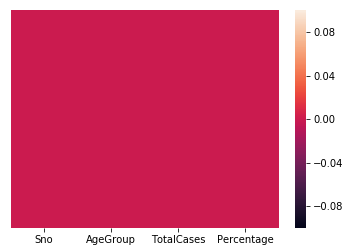

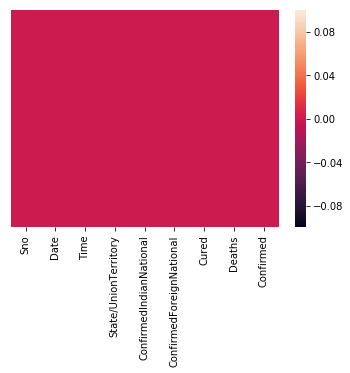

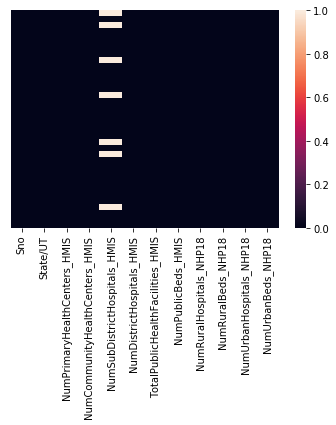

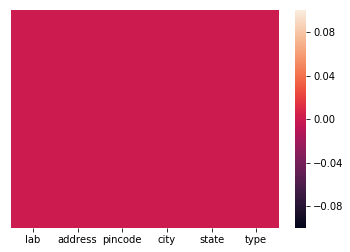

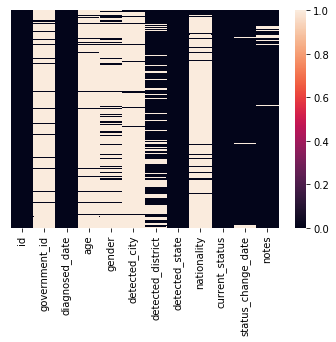

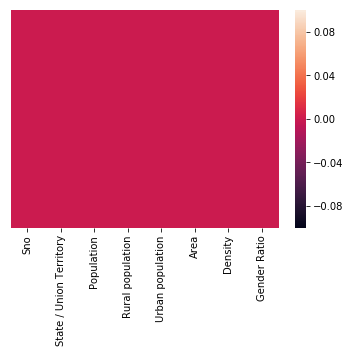

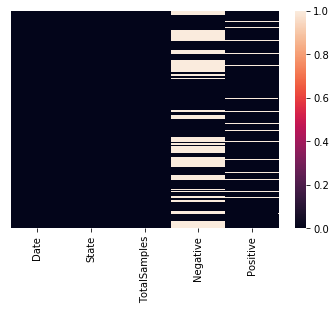

In [11]:
for i in dataset:
    plt.subplots()
    sns.heatmap(i.isnull(),yticklabels=False)

In [12]:
hospitalBeds.dtypes

Sno                                   int64
State/UT                             object
NumPrimaryHealthCenters_HMIS         object
NumCommunityHealthCenters_HMIS        int64
NumSubDistrictHospitals_HMIS        float64
NumDistrictHospitals_HMIS             int64
TotalPublicHealthFacilities_HMIS      int64
NumPublicBeds_HMIS                    int64
NumRuralHospitals_NHP18               int64
NumRuralBeds_NHP18                    int64
NumUrbanHospitals_NHP18               int64
NumUrbanBeds_NHP18                    int64
dtype: object

In [13]:
np.where(hospitalBeds.NumUrbanBeds_NHP18==0)

(array([ 8, 18], dtype=int64),)

In [14]:
#hospitalBeds.dtypes
#hospitalBeds.loc[hospitalBeds['NumSubDistrictHospitals_HMIS']==0.0]
hospitalBeds.fillna(0,axis=1,inplace=True)
#hospitalBeds.isnull().sum()

In [15]:
hospitalBeds.head()

,Sno,State/UT,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18
0,1,Andaman & Nicobar Islands,27,4,0.0,3,34,1246,27,575,3,500
1,2,Andhra Pradesh,1417,198,31.0,20,1666,60799,193,6480,65,16658
2,3,Arunachal Pradesh,122,62,0.0,15,199,2320,208,2136,10,268
3,4,Assam,1007,166,14.0,33,1220,19115,1176,10944,50,6198
4,5,Bihar,2007,63,33.0,43,2146,17796,930,6083,103,5936


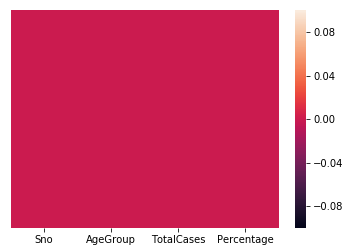

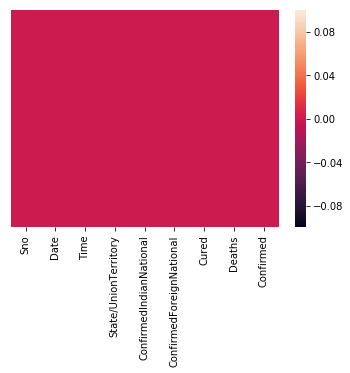

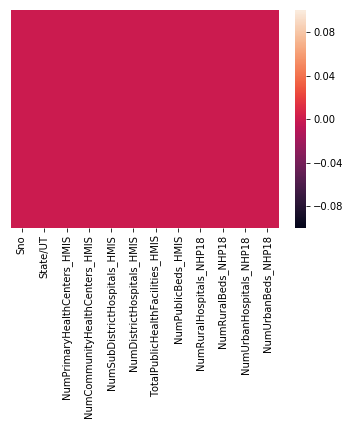

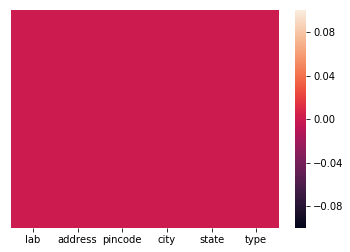

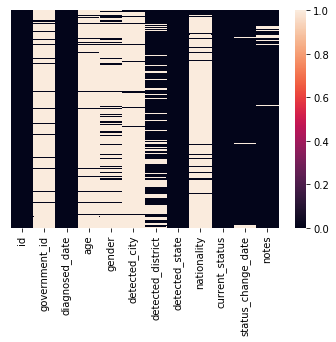

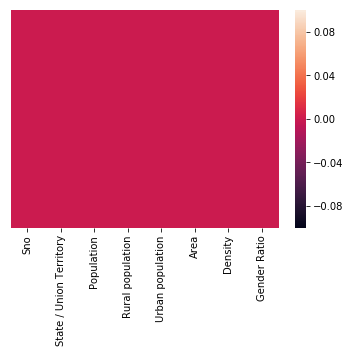

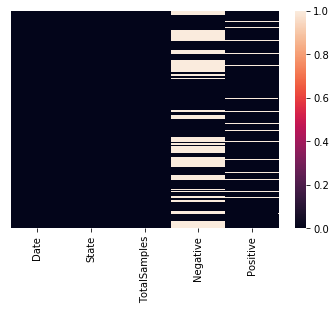

In [16]:
for i in dataset:
    plt.subplots()
    sns.heatmap(i.isnull(),yticklabels=False)

In [17]:
individualDetails.drop(['id','government_id'],axis=1,inplace=True)
individualDetails.head()

,diagnosed_date,age,gender,detected_city,detected_district,detected_state,nationality,current_status,status_change_date,notes
0,30/01/2020,20,F,Thrissur,Thrissur,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
1,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
2,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
3,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,India,Recovered,15/03/2020,"Travelled from Austria, Italy"
4,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,India,Recovered,02/03/2020,"Travelled from Dubai to Bangalore on 20th Feb,..."


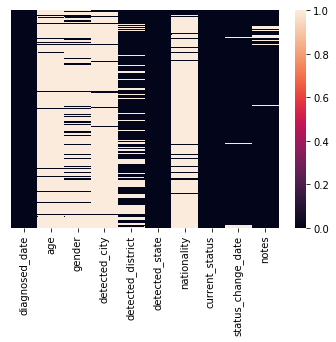

In [18]:
plt.subplots()
sns.heatmap(individualDetails.isnull(),yticklabels=False)

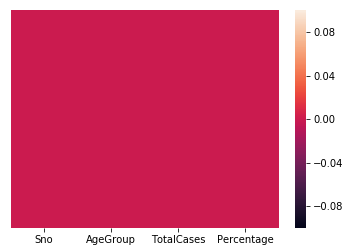

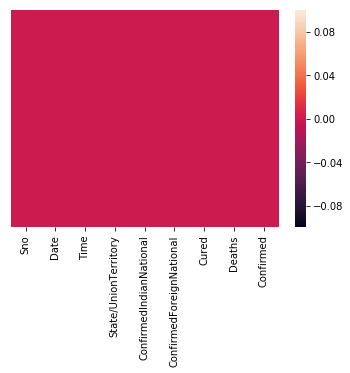

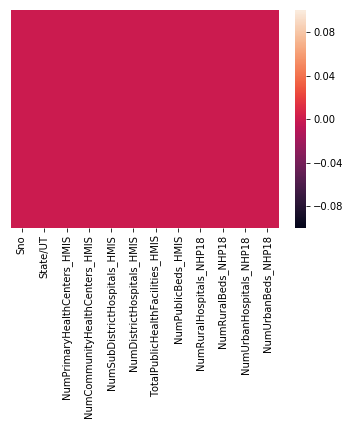

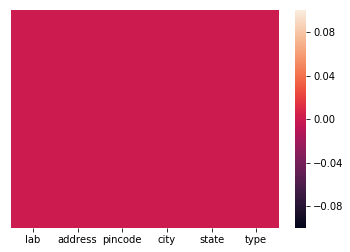

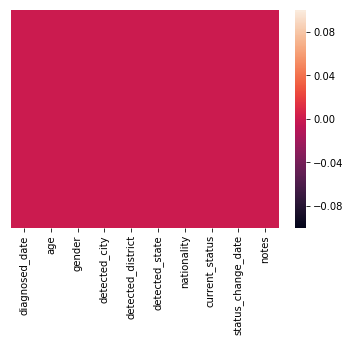

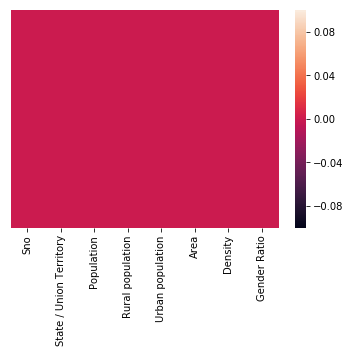

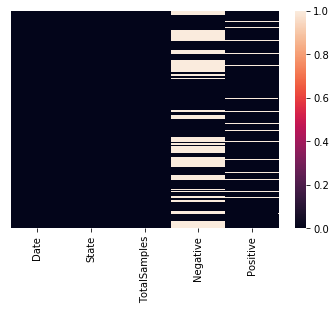

In [19]:
individualDetails.fillna('Not Known',inplace=True,axis=1)
for i in dataset:
    plt.subplots()
    sns.heatmap(i.isnull(),yticklabels=False)

In [20]:
statewiseTesting.head()

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0


In [21]:
index = np.array(statewiseTesting.loc[(statewiseTesting['Positive'].isnull())&(statewiseTesting['Negative'].isnull())].index)
#statewiseTesting.dtypes
#len(index)
statewiseTesting.drop(index,axis=0,inplace=True)
statewiseTesting.loc[(statewiseTesting['Positive'].isnull())&(statewiseTesting['Negative'].isnull())]

,Date,State,TotalSamples,Negative,Positive


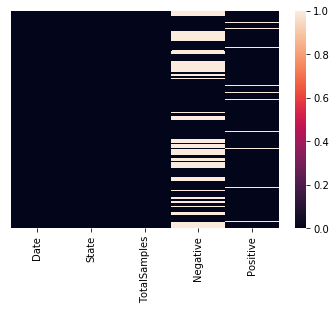

In [22]:
plt.subplots()
sns.heatmap(statewiseTesting.isnull(),yticklabels=False)

In [23]:
#pd.to_numeric(statewiseTesting.Negative)
#statewiseTesting.fillna('Not Known',axis=1,inplace=True)
#statewiseTesting.head()
#statewiseTesting['not_known'] = np.where((statewiseTesting['Negative'].isnull()|statewiseTesting['Negative'].isnull()),1,0)

In [24]:
statewiseTesting.head()

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0


In [25]:
#pd.to_numeric(statewiseTesting.Negative)
statewiseTesting.fillna('Not Known',axis=1,inplace=True)

In [26]:
# dataset = [ageGroup,covidIndia,hospitalBeds,ICMRLabs,individualDetails,populationCensus,statewiseTesting]
# names = ['ageGroup','covidIndia','hospitalBeds','ICMRLabs','individualDetails','populationCensus','statewiseTesting']

In [27]:
statewise_not_known_negative = statewiseTesting.loc[statewiseTesting.Negative=='Not Known']
statewise_not_known_positive = statewiseTesting.loc[statewiseTesting.Positive=='Not Known']

In [28]:
statewise_not_known_negative.head()

,Date,State,TotalSamples,Negative,Positive
1,2020-04-24,Andaman and Nicobar Islands,2679.0,Not Known,27
2,2020-04-27,Andaman and Nicobar Islands,2848.0,Not Known,33
3,2020-05-01,Andaman and Nicobar Islands,3754.0,Not Known,33
4,2020-05-16,Andaman and Nicobar Islands,6677.0,Not Known,33
5,2020-05-19,Andaman and Nicobar Islands,6965.0,Not Known,33


In [29]:
statewise_not_known_negative['Positive'] = pd.to_numeric(statewise_not_known_negative['Positive'])
statewise_not_known_negative['Negative'] = statewise_not_known_negative['TotalSamples'] - statewise_not_known_negative['Positive']
statewise_not_known_negative.dtypes

C:\Users\shash\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\shash\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Date             object
State            object
TotalSamples    float64
Negative        float64
Positive        float64
dtype: object

In [30]:
statewise_not_known_negative.head()

,Date,State,TotalSamples,Negative,Positive
1,2020-04-24,Andaman and Nicobar Islands,2679.0,2652.0,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,2815.0,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,3721.0,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,6644.0,33.0
5,2020-05-19,Andaman and Nicobar Islands,6965.0,6932.0,33.0


In [31]:
statewise_not_known_positive.head()

,Date,State,TotalSamples,Negative,Positive
228,2020-08-11,Andhra Pradesh,2592619.0,2348070,Not Known
229,2020-08-12,Andhra Pradesh,2649767.0,2395621,Not Known
230,2020-08-13,Andhra Pradesh,2705459.0,2441317,Not Known
231,2020-08-14,Andhra Pradesh,2758485.0,2485400,Not Known
232,2020-08-15,Andhra Pradesh,2812197.0,2530380,Not Known


In [32]:
statewise_not_known_positive.Negative=pd.to_numeric(statewise_not_known_positive.Negative)
statewise_not_known_positive.head().dtypes

C:\Users\shash\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Date             object
State            object
TotalSamples    float64
Negative          int64
Positive         object
dtype: object

In [33]:
statewise_not_known_positive['Positive'] = statewise_not_known_positive['TotalSamples'] - statewise_not_known_positive['Negative']

C:\Users\shash\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [34]:
statewise_not_known_positive.head()

,Date,State,TotalSamples,Negative,Positive
228,2020-08-11,Andhra Pradesh,2592619.0,2348070,244549.0
229,2020-08-12,Andhra Pradesh,2649767.0,2395621,254146.0
230,2020-08-13,Andhra Pradesh,2705459.0,2441317,264142.0
231,2020-08-14,Andhra Pradesh,2758485.0,2485400,273085.0
232,2020-08-15,Andhra Pradesh,2812197.0,2530380,281817.0


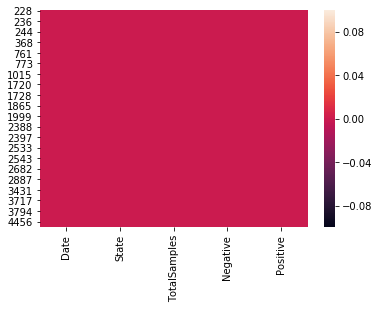

In [35]:
sns.heatmap(statewise_not_known_positive.isnull())

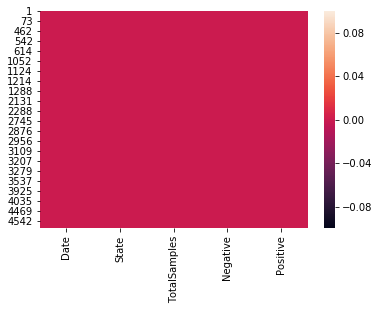

In [36]:
sns.heatmap(statewise_not_known_negative.isnull())

In [37]:
statewise_known = statewiseTesting.loc[(statewiseTesting.Negative!='Not Known') & (statewiseTesting.Positive!='Not Known')]

In [38]:
statewiseTesting

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12
1,2020-04-24,Andaman and Nicobar Islands,2679.0,Not Known,27
2,2020-04-27,Andaman and Nicobar Islands,2848.0,Not Known,33
3,2020-05-01,Andaman and Nicobar Islands,3754.0,Not Known,33
4,2020-05-16,Andaman and Nicobar Islands,6677.0,Not Known,33
5,2020-05-19,Andaman and Nicobar Islands,6965.0,Not Known,33
6,2020-05-20,Andaman and Nicobar Islands,7082.0,Not Known,33
7,2020-05-21,Andaman and Nicobar Islands,7167.0,Not Known,33
8,2020-05-22,Andaman and Nicobar Islands,7263.0,Not Known,33
9,2020-05-23,Andaman and Nicobar Islands,7327.0,Not Known,33


In [39]:
statewiseTesting_not_known = statewise_not_known_negative.combine_first(statewise_not_known_positive)

In [40]:
statewiseTesting = statewiseTesting_not_known.combine_first(statewise_known)

In [41]:
statewiseTesting.dtypes

Date             object
State            object
TotalSamples    float64
Negative         object
Positive        float64
dtype: object

In [42]:
statewiseTesting.head()

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,2652,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,2815,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,3721,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,6644,33.0


In [43]:
statewiseTesting.isnull().sum()

Date            0
State           0
TotalSamples    0
Negative        0
Positive        0
dtype: int64

In [44]:
temp = statewiseTesting.iloc[3000,:].TotalSamples - statewiseTesting.iloc[3000,:].Positive

In [45]:
statewiseTesting.loc[(statewiseTesting.Negative == ' '),['Negative']] = temp

In [46]:
statewiseTesting.iloc[3000,:]

Date            2020-06-20
State             Nagaland
TotalSamples          9128
Negative              8927
Positive               201
Name: 3094, dtype: object

In [47]:
statewiseTesting.Negative = pd.to_numeric(statewiseTesting.Negative)

In [48]:
statewiseTesting.dtypes

Date             object
State            object
TotalSamples    float64
Negative        float64
Positive        float64
dtype: object

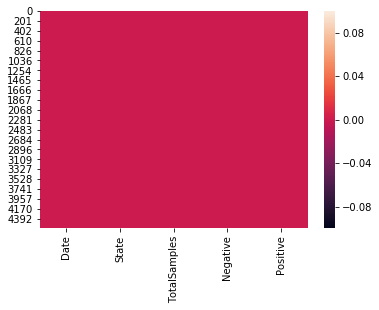

In [49]:
sns.heatmap(statewiseTesting.isnull())

In [50]:
statewiseTesting.head()

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210.0,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,2652.0,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,2815.0,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,3721.0,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,6644.0,33.0


In [51]:
dataset[-1] = statewiseTesting

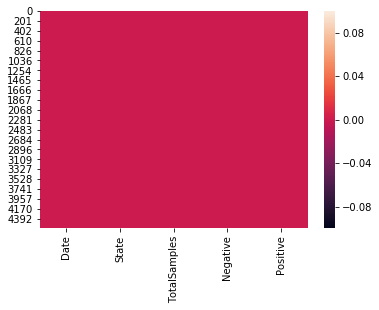

In [52]:
sns.heatmap(dataset[-1].isnull())

In [53]:
# dataset = [ageGroup,covidIndia,hospitalBeds,ICMRLabs,individualDetails,populationCensus,statewiseTesting]

In [54]:
dataset[0]

,Sno,AgeGroup,TotalCases,Percentage
0,1,0-9,22,3.18%
1,2,10-19,27,3.90%
2,3,20-29,172,24.86%
3,4,30-39,146,21.10%
4,5,40-49,112,16.18%
5,6,50-59,77,11.13%
6,7,60-69,89,12.86%
7,8,70-79,28,4.05%
8,9,>=80,10,1.45%
9,10,Missing,9,1.30%


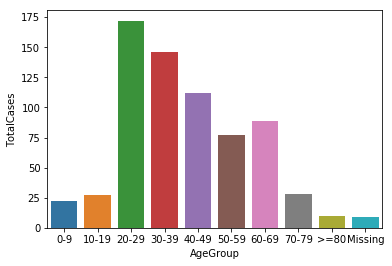

In [55]:
sns.barplot(data=dataset[0], x='AgeGroup',y='TotalCases')

In [56]:
dataset[1].head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


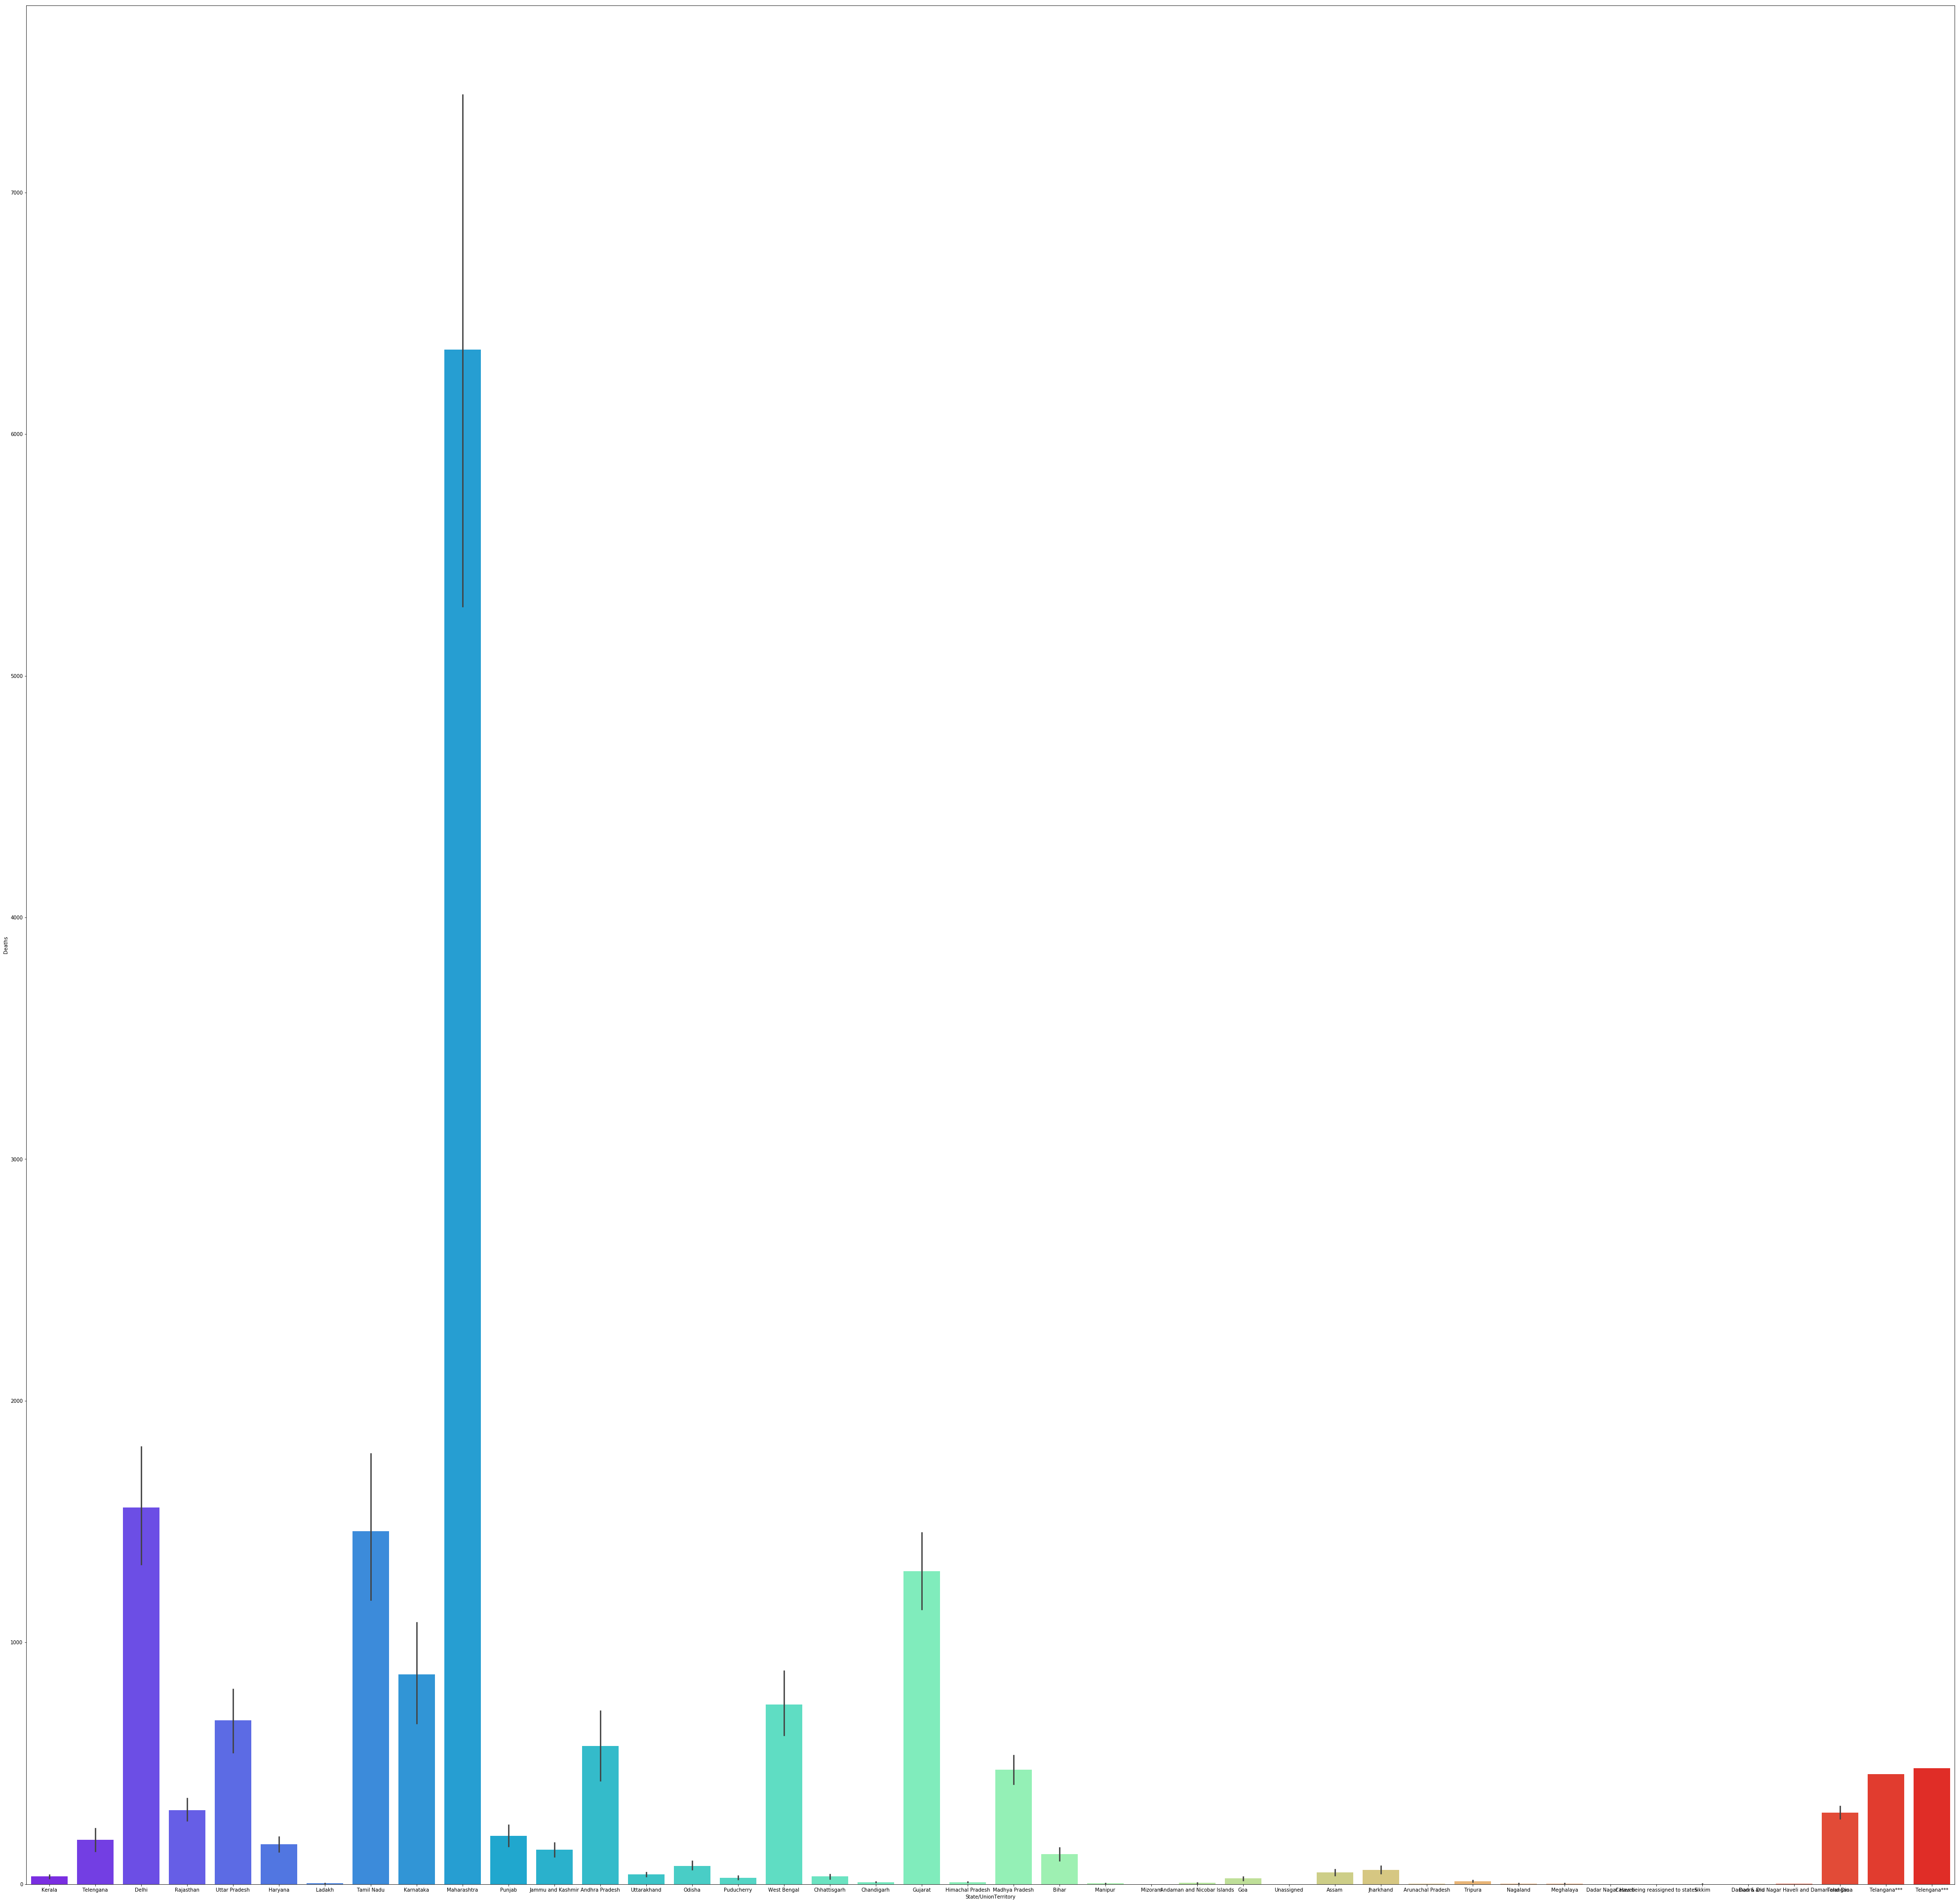

In [57]:
plt.figure(figsize=(70,70))
sns.barplot(data=dataset[1],y='Deaths',x='State/UnionTerritory',palette='rainbow')

In [58]:
state_group = dataset[1].groupby('State/UnionTerritory')

In [59]:
states = dataset[1]['State/UnionTerritory'].unique()

In [60]:
sorted(states)

['Andaman and Nicobar Islands',
 'Andhra Pradesh',
 'Arunachal Pradesh',
 'Assam',
 'Bihar',
 'Cases being reassigned to states',
 'Chandigarh',
 'Chhattisgarh',
 'Dadar Nagar Haveli',
 'Dadra and Nagar Haveli and Daman and Diu',
 'Daman & Diu',
 'Delhi',
 'Goa',
 'Gujarat',
 'Haryana',
 'Himachal Pradesh',
 'Jammu and Kashmir',
 'Jharkhand',
 'Karnataka',
 'Kerala',
 'Ladakh',
 'Madhya Pradesh',
 'Maharashtra',
 'Manipur',
 'Meghalaya',
 'Mizoram',
 'Nagaland',
 'Odisha',
 'Puducherry',
 'Punjab',
 'Rajasthan',
 'Sikkim',
 'Tamil Nadu',
 'Telangana',
 'Telangana***',
 'Telengana',
 'Telengana***',
 'Tripura',
 'Unassigned',
 'Uttar Pradesh',
 'Uttarakhand',
 'West Bengal']

In [61]:
cases = {}
for i in states:
    max = state_group.get_group(i).Confirmed.max()
    cases[i] = max;

top5 = []
for i in range(5):
    keys = list(cases.keys())
    values = list(cases.values())
    max = values[0]
    maxKey = keys[0]
    for i in range(len(values)):
        if values[i]>max:
            max = values[i]
            maxKey = keys[i]
    top5.append(maxKey)
    cases[maxKey] = 0
    
cases = {}
for i in states:
    max = state_group.get_group(i).Confirmed.max()
    cases[i] = max;

In [62]:
top5

['Maharashtra', 'Tamil Nadu', 'Andhra Pradesh', 'Karnataka', 'Uttar Pradesh']

In [63]:
print(sorted(cases.values(),reverse=True))

[764281, 415590, 414164, 327076, 219457, 171366, 156766, 133003, 123090, 103794, 97920, 93734, 78777, 71701, 61987, 60875, 57142, 54059, 52466, 50848, 36857, 36377, 28746, 18571, 16553, 13556, 11307, 9265, 5960, 5781, 3985, 3877, 3851, 3081, 2603, 2306, 2283, 1602, 1008, 77, 26, 2]


In [64]:
import matplotlib
%matplotlib inline

In [65]:
for i in top5:
    print(cases[i])

764281
415590
414164
327076
219457


C:\Users\shash\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


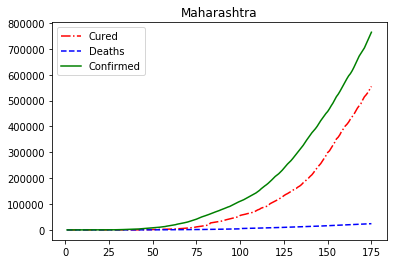

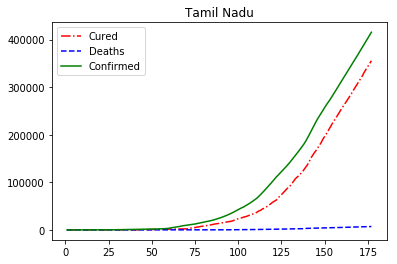

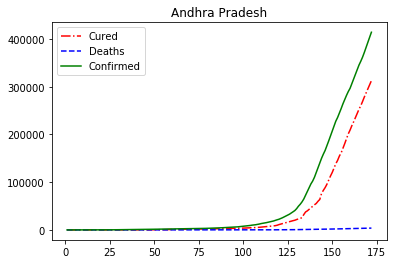

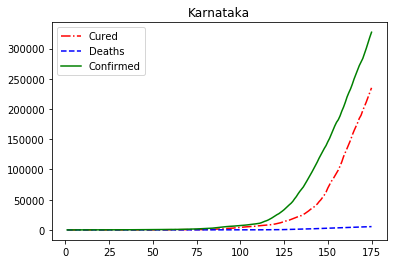

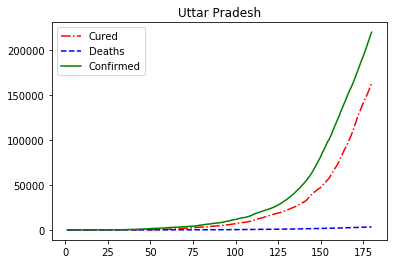

In [66]:
for i in top5:
    days = []
    c = 0
    case = state_group.get_group(i)
    for j in case.Date:
        c += 1
        days.append(c)
    case['days'] = days
    fig,ax = plt.subplots()
    plt.plot(case['days'],case['Cured'],'-.r')
    plt.plot(case['days'],case['Deaths'],'--b')
    plt.plot(case['days'],case['Confirmed'],'g')
    leg = ax.legend();
    plt.title(i)

In [67]:
case = state_group.get_group('Bihar')
case.head(10)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
271,272,22/03/20,6:00 PM,Bihar,2,0,0,1,2
294,295,23/03/20,6:00 PM,Bihar,2,0,0,1,2
317,318,24/03/20,6:00 PM,Bihar,3,0,0,1,3
341,342,25/03/20,6:00 PM,Bihar,4,0,0,1,4
367,368,26/03/20,6:00 PM,Bihar,6,0,0,1,6
394,395,27/03/20,10:00 AM,Bihar,6,0,0,1,6
421,422,28/03/20,6:00 PM,Bihar,9,0,0,1,9
448,449,29/03/20,7:30 PM,Bihar,-,-,0,1,11
475,476,30/03/20,9:30 PM,Bihar,-,-,0,1,15
503,504,31/03/20,8:30 PM,Bihar,-,-,0,1,15


C:\Users\shash\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


Text(0.5, 1.0, 'Bihar')

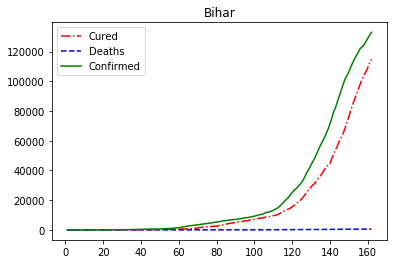

In [68]:
days = []
c = 0
case = state_group.get_group('Bihar')
for j in case.Date:
    c += 1
    days.append(c)
case['days'] = days
fig,ax = plt.subplots()
plt.plot(case['days'],case['Cured'],'-.r')
plt.plot(case['days'],case['Deaths'],'--b')
plt.plot(case['days'],case['Confirmed'],'g')
leg = ax.legend();
plt.title('Bihar')

In [69]:
case.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,days
271,272,22/03/20,6:00 PM,Bihar,2,0,0,1,2,1
294,295,23/03/20,6:00 PM,Bihar,2,0,0,1,2,2
317,318,24/03/20,6:00 PM,Bihar,3,0,0,1,3,3
341,342,25/03/20,6:00 PM,Bihar,4,0,0,1,4,4
367,368,26/03/20,6:00 PM,Bihar,6,0,0,1,6,5


In [70]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.preprocessing import PolynomialFeatures
model = LR()

In [71]:
X = case.iloc[:,-1]
y = case.Confirmed

In [72]:
y

271          2
294          2
317          3
341          4
367          6
394          6
421          9
448         11
475         15
503         15
532         23
561         24
591         29
622         30
652         30
682         32
712         32
743         38
774         39
805         60
836         60
867         64
898         64
930         66
963         70
996         74
1029        83
1062        85
1095        86
1128        96
         ...  
4710     51233
4745     54240
4780     57024
4815     59328
4850     61788
4885     64770
4920     67788
4955     71304
4990     75294
5025     79451
5060     82550
5095     86413
5130     90321
5165     94193
5200     98008
5235    101551
5270    103844
5305    106307
5340    109498
5375    112437
5410    114941
5445    117413
5480    119529
5515    121947
5550    123198
5585    124536
5620    126714
5655    128780
5690    131057
5725    133003
Name: Confirmed, Length: 162, dtype: int64

In [73]:
y = np.array(y).reshape(-1,1)

In [74]:
y

array([[     2],
       [     2],
       [     3],
       [     4],
       [     6],
       [     6],
       [     9],
       [    11],
       [    15],
       [    15],
       [    23],
       [    24],
       [    29],
       [    30],
       [    30],
       [    32],
       [    32],
       [    38],
       [    39],
       [    60],
       [    60],
       [    64],
       [    64],
       [    66],
       [    70],
       [    74],
       [    83],
       [    85],
       [    86],
       [    96],
       [   114],
       [   126],
       [   148],
       [   176],
       [   228],
       [   251],
       [   277],
       [   346],
       [   383],
       [   403],
       [   426],
       [   471],
       [   482],
       [   517],
       [   529],
       [   536],
       [   542],
       [   550],
       [   571],
       [   591],
       [   696],
       [   747],
       [   831],
       [   940],
       [   994],
       [  1018],
       [  1179],
       [  1262],
       [  1391

In [75]:
X = np.array(X).reshape(-1,1)

In [76]:
model.fit(X,y)
poly = PolynomialFeatures(degree = 4)
X_poly = poly.fit_transform(X)
poly.fit(X_poly,y)
lin2 = LR() 
lin2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Enter no. of days after you want to predict for Bihar
10
[[199954.20179698]]


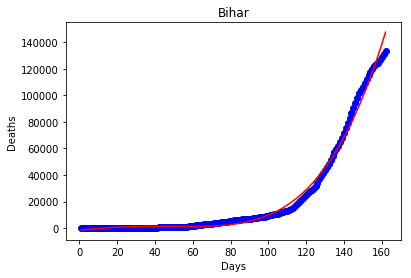

In [77]:
plt.subplots()
#Polynomial Regression
plt.scatter(X, y, color = 'blue')
plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'red')
plt.title('Bihar') 
plt.xlabel('Days') 
plt.ylabel('Deaths') 

print('Enter no. of days after you want to predict for', 'Bihar')
pred = int(input())
print(lin2.predict(poly.fit_transform([[pred+X.max()]])))

In [78]:
case.Date.max()

'31/07/20'

In [79]:
case.drop(['ConfirmedForeignNational','ConfirmedIndianNational'],inplace=True,axis=1)


C:\Users\shash\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [80]:
case.head()

,Sno,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed,days
271,272,22/03/20,6:00 PM,Bihar,0,1,2,1
294,295,23/03/20,6:00 PM,Bihar,0,1,2,2
317,318,24/03/20,6:00 PM,Bihar,0,1,3,3
341,342,25/03/20,6:00 PM,Bihar,0,1,4,4
367,368,26/03/20,6:00 PM,Bihar,0,1,6,5


In [81]:
case.head()

,Sno,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed,days
271,272,22/03/20,6:00 PM,Bihar,0,1,2,1
294,295,23/03/20,6:00 PM,Bihar,0,1,2,2
317,318,24/03/20,6:00 PM,Bihar,0,1,3,3
341,342,25/03/20,6:00 PM,Bihar,0,1,4,4
367,368,26/03/20,6:00 PM,Bihar,0,1,6,5


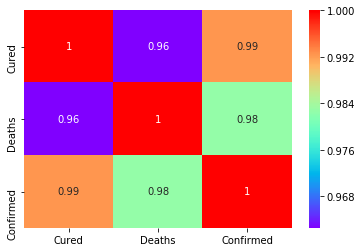

In [82]:
sns.heatmap(case.iloc[:,1:-1].corr(),cmap='rainbow', annot=True)

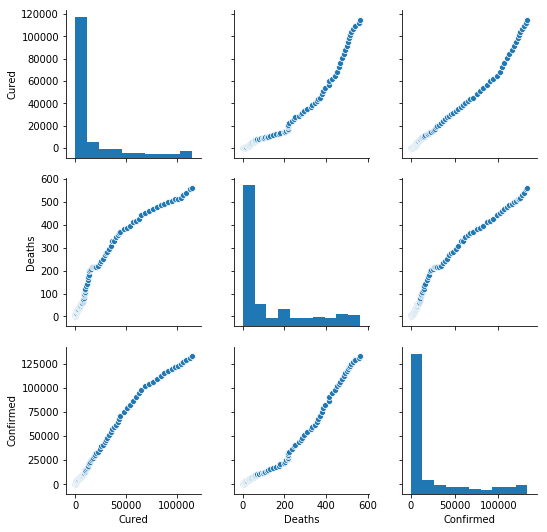

In [83]:
sns.pairplot(case.iloc[:,1:-1])

In [84]:
names = 'ageGroup,covidIndia,hospitalBeds,ICMRLabs,individualDetails,populationCensus,statewiseTesting'
names = names.split(',')

In [85]:
names

['ageGroup',
 'covidIndia',
 'hospitalBeds',
 'ICMRLabs',
 'individualDetails',
 'populationCensus',
 'statewiseTesting']

In [86]:
dataset[2] = hospitalBeds

In [87]:
dataset[2].head()

,Sno,State/UT,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18
0,1,Andaman & Nicobar Islands,27,4,0.0,3,34,1246,27,575,3,500
1,2,Andhra Pradesh,1417,198,31.0,20,1666,60799,193,6480,65,16658
2,3,Arunachal Pradesh,122,62,0.0,15,199,2320,208,2136,10,268
3,4,Assam,1007,166,14.0,33,1220,19115,1176,10944,50,6198
4,5,Bihar,2007,63,33.0,43,2146,17796,930,6083,103,5936


In [88]:
dataset[2].isnull().sum()

Sno                                 0
State/UT                            0
NumPrimaryHealthCenters_HMIS        0
NumCommunityHealthCenters_HMIS      0
NumSubDistrictHospitals_HMIS        0
NumDistrictHospitals_HMIS           0
TotalPublicHealthFacilities_HMIS    0
NumPublicBeds_HMIS                  0
NumRuralHospitals_NHP18             0
NumRuralBeds_NHP18                  0
NumUrbanHospitals_NHP18             0
NumUrbanBeds_NHP18                  0
dtype: int64

In [89]:
dataset[2].loc[dataset[2].NumPrimaryHealthCenters_HMIS=='29,899','NumPrimaryHealthCenters_HMIS'] = '29899'

In [90]:
dataset[2].NumPrimaryHealthCenters_HMIS = pd.to_numeric(dataset[2].NumPrimaryHealthCenters_HMIS)

In [91]:
dataset[2].iloc[:-1,2:].sum()

NumPrimaryHealthCenters_HMIS         29899.0
NumCommunityHealthCenters_HMIS        5568.0
NumSubDistrictHospitals_HMIS          1255.0
NumDistrictHospitals_HMIS             1003.0
TotalPublicHealthFacilities_HMIS     37725.0
NumPublicBeds_HMIS                  739024.0
NumRuralHospitals_NHP18              19810.0
NumRuralBeds_NHP18                  279588.0
NumUrbanHospitals_NHP18               3772.0
NumUrbanBeds_NHP18                  431173.0
dtype: float64

In [92]:
dataset[2].iloc[0:-1,1:]

,State/UT,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18
0,Andaman & Nicobar Islands,27,4,0.0,3,34,1246,27,575,3,500
1,Andhra Pradesh,1417,198,31.0,20,1666,60799,193,6480,65,16658
2,Arunachal Pradesh,122,62,0.0,15,199,2320,208,2136,10,268
3,Assam,1007,166,14.0,33,1220,19115,1176,10944,50,6198
4,Bihar,2007,63,33.0,43,2146,17796,930,6083,103,5936
5,Chandigarh,40,2,1.0,4,47,3756,0,0,4,778
6,Chhattisgarh,813,166,12.0,32,1023,14354,169,5070,45,4342
7,Dadra & Nagar Haveli,9,2,1.0,1,13,568,10,273,1,316
8,Daman & Diu,4,2,0.0,2,8,298,5,240,0,0
9,Delhi,534,25,9.0,47,615,20572,0,0,109,24383


In [93]:
dataset[2] = dataset[2].iloc[0:-1,1:]

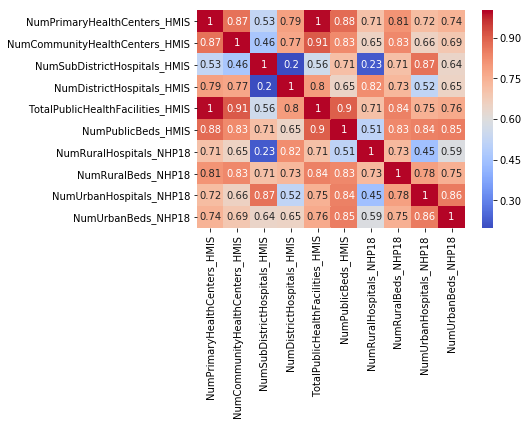

In [94]:
sns.heatmap(dataset[2].corr(),cmap='coolwarm',annot=True)

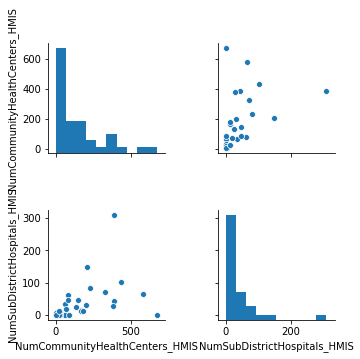

In [95]:
sns.pairplot(dataset[2].iloc[:-1,2:4])

In [96]:
dataset[2]['State/UT']

0     Andaman & Nicobar Islands
1                Andhra Pradesh
2             Arunachal Pradesh
3                         Assam
4                         Bihar
5                    Chandigarh
6                  Chhattisgarh
7          Dadra & Nagar Haveli
8                   Daman & Diu
9                         Delhi
10                          Goa
11                      Gujarat
12                      Haryana
13             Himachal Pradesh
14              Jammu & Kashmir
15                    Jharkhand
16                    Karnataka
17                       Kerala
18                  Lakshadweep
19               Madhya Pradesh
20                  Maharashtra
21                      Manipur
22                    Meghalaya
23                      Mizoram
24                     Nagaland
25                       Odisha
26                   Puducherry
27                       Punjab
28                    Rajasthan
29                       Sikkim
30                   Tamil Nadu
31      

In [97]:
states_unique = []
for i in dataset[2]['State/UT'].unique():
    states_unique.append(i)
states_unique

['Andaman & Nicobar Islands',
 'Andhra Pradesh',
 'Arunachal Pradesh',
 'Assam',
 'Bihar',
 'Chandigarh',
 'Chhattisgarh',
 'Dadra & Nagar Haveli',
 'Daman & Diu',
 'Delhi',
 'Goa',
 'Gujarat',
 'Haryana',
 'Himachal Pradesh',
 'Jammu & Kashmir',
 'Jharkhand',
 'Karnataka',
 'Kerala',
 'Lakshadweep',
 'Madhya Pradesh',
 'Maharashtra',
 'Manipur',
 'Meghalaya',
 'Mizoram',
 'Nagaland',
 'Odisha',
 'Puducherry',
 'Punjab',
 'Rajasthan',
 'Sikkim',
 'Tamil Nadu',
 'Telangana',
 'Tripura',
 'Uttar Pradesh',
 'Uttarakhand',
 'West Bengal']

In [98]:
print(sorted(states_unique))
print(sorted(states))

['Andaman & Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 'Dadra & Nagar Haveli', 'Daman & Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal']
['Andaman and Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Cases being reassigned to states', 'Chandigarh', 'Chhattisgarh', 'Dadar Nagar Haveli', 'Dadra and Nagar Haveli and Daman and Diu', 'Daman & Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikki

In [99]:
list(set(states).difference(set(states_unique)))

['Cases being reassigned to states',
 'Dadra and Nagar Haveli and Daman and Diu',
 'Telengana',
 'Andaman and Nicobar Islands',
 'Telengana***',
 'Unassigned',
 'Jammu and Kashmir',
 'Ladakh',
 'Telangana***',
 'Dadar Nagar Haveli']

In [100]:
state_all = []

In [101]:
states = list(states)

In [103]:
to_remove = ['Telengana***','Telangana***','Dadra and Nagar Haveli and Daman and Diu','Cases being reassigned to states',
              'Unassigned']
for i in to_remove:
    states.remove(i)

In [102]:
sorted(states)
states.remove('Dadar Nagar Haveli')
states.append('Dadar & Nagar Haveli')

In [103]:
sorted(states_unique)
states_unique.remove('Dadra & Nagar Haveli')
states_unique.append('Dadar & Nagar Haveli')

In [104]:
states_unique.remove('Jammu & Kashmir')
states_unique.append('Jammu and Kashmir')

In [105]:
set(sorted(states)).difference(set(sorted(states_unique)))

{'Andaman and Nicobar Islands',
 'Cases being reassigned to states',
 'Dadra and Nagar Haveli and Daman and Diu',
 'Ladakh',
 'Telangana***',
 'Telengana',
 'Telengana***',
 'Unassigned'}

In [106]:
states.remove('Telengana')
states.remove('Telangana')

In [107]:
states_unique.remove('Andaman & Nicobar Islands')
states_unique.append('Andaman and Nicobar Islands')
states_unique.append('Ladakh')

In [108]:
set(sorted(states)).difference(set(sorted(states_unique)))

{'Cases being reassigned to states',
 'Dadra and Nagar Haveli and Daman and Diu',
 'Telangana***',
 'Telengana***',
 'Unassigned'}

In [109]:
states[3].split()[0]

'Uttar'

In [110]:
dataset[2].iloc[:-1,:].head()

,State/UT,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18
0,Andaman & Nicobar Islands,27,4,0.0,3,34,1246,27,575,3,500
1,Andhra Pradesh,1417,198,31.0,20,1666,60799,193,6480,65,16658
2,Arunachal Pradesh,122,62,0.0,15,199,2320,208,2136,10,268
3,Assam,1007,166,14.0,33,1220,19115,1176,10944,50,6198
4,Bihar,2007,63,33.0,43,2146,17796,930,6083,103,5936


In [111]:
for i in dataset[2]['State/UT']:
    for j in states:
        if i.split()[0] != j.split()[0]:
            continue
        else:
            print(True)
            break
        print(False)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [112]:
dataset[1] = dataset[1].rename(columns={'State/UnionTerritory':'State/UT'})

In [113]:
dataset[1]['State/UT'].unique()

array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya', 'Dadar Nagar Haveli',
       'Cases being reassigned to states', 'Sikkim', 'Daman & Diu',
       'Dadra and Nagar Haveli and Daman and Diu', 'Telangana',
       'Telangana***', 'Telengana***'], dtype=object)

In [114]:
merged = pd.merge(left=dataset[1],right=dataset[2].iloc[:-1,:],how='outer',on='State/UT')

In [115]:
merged

,Sno,Date,Time,State/UT,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18
0,1.0,30/01/20,6:00 PM,Kerala,1,0,0.0,0.0,1.0,933.0,229.0,82.0,53.0,1297.0,39511.0,981.0,16865.0,299.0,21139.0
1,2.0,31/01/20,6:00 PM,Kerala,1,0,0.0,0.0,1.0,933.0,229.0,82.0,53.0,1297.0,39511.0,981.0,16865.0,299.0,21139.0
2,3.0,01/02/20,6:00 PM,Kerala,2,0,0.0,0.0,2.0,933.0,229.0,82.0,53.0,1297.0,39511.0,981.0,16865.0,299.0,21139.0
3,4.0,02/02/20,6:00 PM,Kerala,3,0,0.0,0.0,3.0,933.0,229.0,82.0,53.0,1297.0,39511.0,981.0,16865.0,299.0,21139.0
4,5.0,03/02/20,6:00 PM,Kerala,3,0,0.0,0.0,3.0,933.0,229.0,82.0,53.0,1297.0,39511.0,981.0,16865.0,299.0,21139.0
5,6.0,04/02/20,6:00 PM,Kerala,3,0,0.0,0.0,3.0,933.0,229.0,82.0,53.0,1297.0,39511.0,981.0,16865.0,299.0,21139.0
6,7.0,05/02/20,6:00 PM,Kerala,3,0,0.0,0.0,3.0,933.0,229.0,82.0,53.0,1297.0,39511.0,981.0,16865.0,299.0,21139.0
7,8.0,06/02/20,6:00 PM,Kerala,3,0,0.0,0.0,3.0,933.0,229.0,82.0,53.0,1297.0,39511.0,981.0,16865.0,299.0,21139.0
8,9.0,07/02/20,6:00 PM,Kerala,3,0,0.0,0.0,3.0,933.0,229.0,82.0,53.0,1297.0,39511.0,981.0,16865.0,299.0,21139.0
9,10.0,08/02/20,6:00 PM,Kerala,3,0,0.0,0.0,3.0,933.0,229.0,82.0,53.0,1297.0,39511.0,981.0,16865.0,299.0,21139.0


In [189]:
merged.drop(['ConfirmedIndianNational','ConfirmedForeignNational'],axis=1,inplace=True)

In [190]:
merged

,Sno,Date,Time,State/UT,Cured,Deaths,Confirmed,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18
0,1.0,30/01/20,6:00 PM,Kerala,0.0,0.0,1.0,933.0,229.0,82.0,53.0,1297.0,39511.0,981.0,16865.0,299.0,21139.0
1,2.0,31/01/20,6:00 PM,Kerala,0.0,0.0,1.0,933.0,229.0,82.0,53.0,1297.0,39511.0,981.0,16865.0,299.0,21139.0
2,3.0,01/02/20,6:00 PM,Kerala,0.0,0.0,2.0,933.0,229.0,82.0,53.0,1297.0,39511.0,981.0,16865.0,299.0,21139.0
3,4.0,02/02/20,6:00 PM,Kerala,0.0,0.0,3.0,933.0,229.0,82.0,53.0,1297.0,39511.0,981.0,16865.0,299.0,21139.0
4,5.0,03/02/20,6:00 PM,Kerala,0.0,0.0,3.0,933.0,229.0,82.0,53.0,1297.0,39511.0,981.0,16865.0,299.0,21139.0
5,6.0,04/02/20,6:00 PM,Kerala,0.0,0.0,3.0,933.0,229.0,82.0,53.0,1297.0,39511.0,981.0,16865.0,299.0,21139.0
6,7.0,05/02/20,6:00 PM,Kerala,0.0,0.0,3.0,933.0,229.0,82.0,53.0,1297.0,39511.0,981.0,16865.0,299.0,21139.0
7,8.0,06/02/20,6:00 PM,Kerala,0.0,0.0,3.0,933.0,229.0,82.0,53.0,1297.0,39511.0,981.0,16865.0,299.0,21139.0
8,9.0,07/02/20,6:00 PM,Kerala,0.0,0.0,3.0,933.0,229.0,82.0,53.0,1297.0,39511.0,981.0,16865.0,299.0,21139.0
9,10.0,08/02/20,6:00 PM,Kerala,0.0,0.0,3.0,933.0,229.0,82.0,53.0,1297.0,39511.0,981.0,16865.0,299.0,21139.0


In [116]:
len(sorted(merged['State/UT'].unique()))

46

In [117]:
merged.dropna(axis=0,inplace=True)

In [146]:
merged

,Sno,Date,Time,State/UT,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18
0,1.0,30/01/20,6:00 PM,Kerala,1,0,0.0,0.0,1.0,933.0,229.0,82.0,53.0,1297.0,39511.0,981.0,16865.0,299.0,21139.0
1,2.0,31/01/20,6:00 PM,Kerala,1,0,0.0,0.0,1.0,933.0,229.0,82.0,53.0,1297.0,39511.0,981.0,16865.0,299.0,21139.0
2,3.0,01/02/20,6:00 PM,Kerala,2,0,0.0,0.0,2.0,933.0,229.0,82.0,53.0,1297.0,39511.0,981.0,16865.0,299.0,21139.0
3,4.0,02/02/20,6:00 PM,Kerala,3,0,0.0,0.0,3.0,933.0,229.0,82.0,53.0,1297.0,39511.0,981.0,16865.0,299.0,21139.0
4,5.0,03/02/20,6:00 PM,Kerala,3,0,0.0,0.0,3.0,933.0,229.0,82.0,53.0,1297.0,39511.0,981.0,16865.0,299.0,21139.0
5,6.0,04/02/20,6:00 PM,Kerala,3,0,0.0,0.0,3.0,933.0,229.0,82.0,53.0,1297.0,39511.0,981.0,16865.0,299.0,21139.0
6,7.0,05/02/20,6:00 PM,Kerala,3,0,0.0,0.0,3.0,933.0,229.0,82.0,53.0,1297.0,39511.0,981.0,16865.0,299.0,21139.0
7,8.0,06/02/20,6:00 PM,Kerala,3,0,0.0,0.0,3.0,933.0,229.0,82.0,53.0,1297.0,39511.0,981.0,16865.0,299.0,21139.0
8,9.0,07/02/20,6:00 PM,Kerala,3,0,0.0,0.0,3.0,933.0,229.0,82.0,53.0,1297.0,39511.0,981.0,16865.0,299.0,21139.0
9,10.0,08/02/20,6:00 PM,Kerala,3,0,0.0,0.0,3.0,933.0,229.0,82.0,53.0,1297.0,39511.0,981.0,16865.0,299.0,21139.0


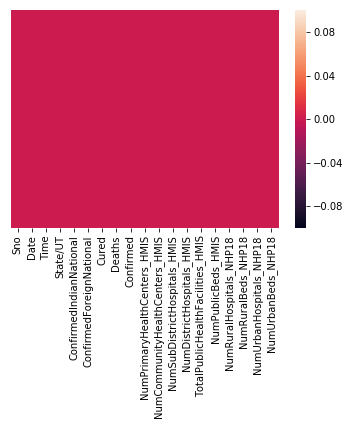

In [147]:
sns.heatmap(merged.isnull(),yticklabels=False)

In [148]:
merged_groups = merged.groupby('State/UT')

In [149]:
merged_groups['NumPrimaryHealthCenters_HMIS'].mean()

State/UT
Andhra Pradesh       1417.0
Arunachal Pradesh     122.0
Assam                1007.0
Bihar                2007.0
Chandigarh             40.0
Chhattisgarh          813.0
Daman & Diu             4.0
Delhi                 534.0
Goa                    31.0
Gujarat              1770.0
Haryana               500.0
Himachal Pradesh      516.0
Jharkhand             343.0
Karnataka            2547.0
Kerala                933.0
Madhya Pradesh       1420.0
Maharashtra          2638.0
Manipur                87.0
Meghalaya             138.0
Mizoram                65.0
Nagaland              134.0
Odisha               1360.0
Puducherry             40.0
Punjab                521.0
Rajasthan            2463.0
Sikkim                 25.0
Tamil Nadu           1854.0
Telangana             788.0
Tripura               114.0
Uttar Pradesh        3277.0
Uttarakhand           275.0
Name: NumPrimaryHealthCenters_HMIS, dtype: float64

In [150]:
primary_health = []
cured = []
for i in merged['State/UT'].unique():
    #print(merged_groups.get_group(i).Cured.max())
    primary_health.append(merged_groups.get_group(i).NumPrimaryHealthCenters_HMIS.max())
    cured.append(merged_groups.get_group(i).Cured.max())

Text(336.9714285714286, 0.5, 'no_of_cured patients')

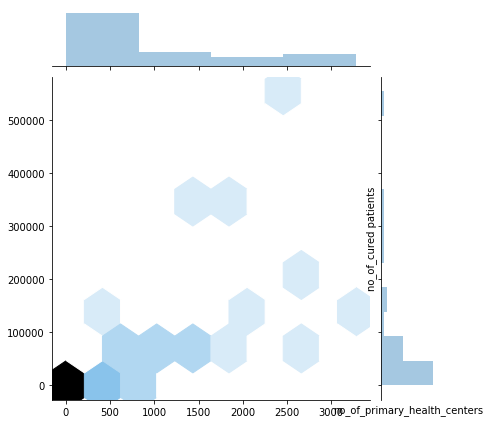

In [151]:
# primary_health
# cured
sns.jointplot(x=primary_health,y=cured,kind='hex')
plt.xlabel('no_of_primary_health_centers')
plt.ylabel('no_of_cured patients')

In [153]:
statewise_hospital_group = {}
for i in merged['State/UT'].unique():
    hospital_groups = {}
    for j in merged_groups.get_group(i).iloc[:,6:].columns:
        hospital_groups[j]=merged_groups.get_group(i).iloc[:,6:][j].max()
#     print(hospital_groups)
    statewise_hospital_group[i] = hospital_groups

In [154]:
statewise_hospital_group

{'Kerala': {'Cured': 48079.0,
  'Deaths': 280.0,
  'Confirmed': 71701.0,
  'NumPrimaryHealthCenters_HMIS': 933.0,
  'NumCommunityHealthCenters_HMIS': 229.0,
  'NumSubDistrictHospitals_HMIS': 82.0,
  'NumDistrictHospitals_HMIS': 53.0,
  'TotalPublicHealthFacilities_HMIS': 1297.0,
  'NumPublicBeds_HMIS': 39511.0,
  'NumRuralHospitals_NHP18': 981.0,
  'NumRuralBeds_NHP18': 16865.0,
  'NumUrbanHospitals_NHP18': 299.0,
  'NumUrbanBeds_NHP18': 21139.0},
 'Delhi': {'Cured': 152922.0,
  'Deaths': 4404.0,
  'Confirmed': 171366.0,
  'NumPrimaryHealthCenters_HMIS': 534.0,
  'NumCommunityHealthCenters_HMIS': 25.0,
  'NumSubDistrictHospitals_HMIS': 9.0,
  'NumDistrictHospitals_HMIS': 47.0,
  'TotalPublicHealthFacilities_HMIS': 615.0,
  'NumPublicBeds_HMIS': 20572.0,
  'NumRuralHospitals_NHP18': 0.0,
  'NumRuralBeds_NHP18': 0.0,
  'NumUrbanHospitals_NHP18': 109.0,
  'NumUrbanBeds_NHP18': 24383.0},
 'Rajasthan': {'Cured': 62971.0,
  'Deaths': 1030.0,
  'Confirmed': 78777.0,
  'NumPrimaryHealthCenters

In [155]:
hospitals = pd.DataFrame(statewise_hospital_group).transpose()
hospitals

,Confirmed,Cured,Deaths,NumCommunityHealthCenters_HMIS,NumDistrictHospitals_HMIS,NumPrimaryHealthCenters_HMIS,NumPublicBeds_HMIS,NumRuralBeds_NHP18,NumRuralHospitals_NHP18,NumSubDistrictHospitals_HMIS,NumUrbanBeds_NHP18,NumUrbanHospitals_NHP18,TotalPublicHealthFacilities_HMIS
Kerala,71701.0,48079.0,280.0,229.0,53.0,933.0,39511.0,16865.0,981.0,82.0,21139.0,299.0,1297.0
Delhi,171366.0,152922.0,4404.0,25.0,47.0,534.0,20572.0,0.0,0.0,9.0,24383.0,109.0,615.0
Rajasthan,78777.0,62971.0,1030.0,579.0,33.0,2463.0,51844.0,21088.0,602.0,64.0,10760.0,150.0,3139.0
Uttar Pradesh,219457.0,162741.0,3356.0,671.0,174.0,3277.0,58310.0,39104.0,4442.0,0.0,37156.0,193.0,4122.0
Haryana,61987.0,50711.0,670.0,131.0,28.0,500.0,13841.0,6690.0,609.0,24.0,4550.0,59.0,683.0
Tamil Nadu,415590.0,355727.0,7137.0,385.0,32.0,1854.0,72616.0,40179.0,692.0,310.0,37353.0,525.0,2581.0
Karnataka,327076.0,235128.0,5483.0,207.0,42.0,2547.0,56333.0,21072.0,2471.0,147.0,49093.0,374.0,2943.0
Maharashtra,764281.0,554711.0,24103.0,430.0,70.0,2638.0,68998.0,12398.0,273.0,101.0,39048.0,438.0,3239.0
Punjab,50848.0,34091.0,1348.0,146.0,28.0,521.0,13527.0,5805.0,510.0,47.0,12128.0,172.0,742.0
Andhra Pradesh,414164.0,312687.0,3796.0,198.0,20.0,1417.0,60799.0,6480.0,193.0,31.0,16658.0,65.0,1666.0


In [142]:
len(hospitals.index)

31

In [156]:
np.arange(0,32)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [157]:
arr = hospitals.index
arr

Index(['Kerala', 'Delhi', 'Rajasthan', 'Uttar Pradesh', 'Haryana',
       'Tamil Nadu', 'Karnataka', 'Maharashtra', 'Punjab', 'Andhra Pradesh',
       'Uttarakhand', 'Odisha', 'Puducherry', 'Chhattisgarh', 'Chandigarh',
       'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh', 'Bihar', 'Manipur',
       'Mizoram', 'Goa', 'Assam', 'Jharkhand', 'Arunachal Pradesh', 'Tripura',
       'Nagaland', 'Meghalaya', 'Sikkim', 'Daman & Diu', 'Telangana'],
      dtype='object')

In [158]:
hospitals.set_index(np.arange(0,31),drop=False,inplace=True)
hospitals['State/UT'] = arr
hospitals

,Confirmed,Cured,Deaths,NumCommunityHealthCenters_HMIS,NumDistrictHospitals_HMIS,NumPrimaryHealthCenters_HMIS,NumPublicBeds_HMIS,NumRuralBeds_NHP18,NumRuralHospitals_NHP18,NumSubDistrictHospitals_HMIS,NumUrbanBeds_NHP18,NumUrbanHospitals_NHP18,TotalPublicHealthFacilities_HMIS,State/UT
0,71701.0,48079.0,280.0,229.0,53.0,933.0,39511.0,16865.0,981.0,82.0,21139.0,299.0,1297.0,Kerala
1,171366.0,152922.0,4404.0,25.0,47.0,534.0,20572.0,0.0,0.0,9.0,24383.0,109.0,615.0,Delhi
2,78777.0,62971.0,1030.0,579.0,33.0,2463.0,51844.0,21088.0,602.0,64.0,10760.0,150.0,3139.0,Rajasthan
3,219457.0,162741.0,3356.0,671.0,174.0,3277.0,58310.0,39104.0,4442.0,0.0,37156.0,193.0,4122.0,Uttar Pradesh
4,61987.0,50711.0,670.0,131.0,28.0,500.0,13841.0,6690.0,609.0,24.0,4550.0,59.0,683.0,Haryana
5,415590.0,355727.0,7137.0,385.0,32.0,1854.0,72616.0,40179.0,692.0,310.0,37353.0,525.0,2581.0,Tamil Nadu
6,327076.0,235128.0,5483.0,207.0,42.0,2547.0,56333.0,21072.0,2471.0,147.0,49093.0,374.0,2943.0,Karnataka
7,764281.0,554711.0,24103.0,430.0,70.0,2638.0,68998.0,12398.0,273.0,101.0,39048.0,438.0,3239.0,Maharashtra
8,50848.0,34091.0,1348.0,146.0,28.0,521.0,13527.0,5805.0,510.0,47.0,12128.0,172.0,742.0,Punjab
9,414164.0,312687.0,3796.0,198.0,20.0,1417.0,60799.0,6480.0,193.0,31.0,16658.0,65.0,1666.0,Andhra Pradesh


In [174]:
# statewise_cured = {}
# temp_state = []
# cured = []
# for i in merged['State/UT'].unique():
#     temp_state.append(i)
#     cured.append([merged_groups.get_group(i)['Cured'].max(),merged_groups.get_group(i)['Deaths'].max()])
# statewise_cured['State/UT'] = temp_state
# statewise_cured['Cured'] = cured

statewise_cured_deaths = {}
for i in merged['State/UT'].unique():
    cured_deaths = {}
    for j in merged_groups.get_group(i).iloc[:,6:9].columns:
        cured_deaths[j] = merged_groups.get_group(i).iloc[:,6:9][j].max()
    statewise_cured_deaths[i] = cured_deaths

In [175]:
statewise_cured_deaths

{'Kerala': {'Cured': 48079.0, 'Deaths': 280.0, 'Confirmed': 71701.0},
 'Delhi': {'Cured': 152922.0, 'Deaths': 4404.0, 'Confirmed': 171366.0},
 'Rajasthan': {'Cured': 62971.0, 'Deaths': 1030.0, 'Confirmed': 78777.0},
 'Uttar Pradesh': {'Cured': 162741.0, 'Deaths': 3356.0, 'Confirmed': 219457.0},
 'Haryana': {'Cured': 50711.0, 'Deaths': 670.0, 'Confirmed': 61987.0},
 'Tamil Nadu': {'Cured': 355727.0, 'Deaths': 7137.0, 'Confirmed': 415590.0},
 'Karnataka': {'Cured': 235128.0, 'Deaths': 5483.0, 'Confirmed': 327076.0},
 'Maharashtra': {'Cured': 554711.0, 'Deaths': 24103.0, 'Confirmed': 764281.0},
 'Punjab': {'Cured': 34091.0, 'Deaths': 1348.0, 'Confirmed': 50848.0},
 'Andhra Pradesh': {'Cured': 312687.0,
  'Deaths': 3796.0,
  'Confirmed': 414164.0},
 'Uttarakhand': {'Cured': 12586.0, 'Deaths': 250.0, 'Confirmed': 18571.0},
 'Odisha': {'Cured': 70714.0, 'Deaths': 470.0, 'Confirmed': 97920.0},
 'Puducherry': {'Cured': 8511.0, 'Deaths': 211.0, 'Confirmed': 13556.0},
 'Chhattisgarh': {'Cured': 

In [192]:
CuredVSHospitals = pd.DataFrame(pd.DataFrame(statewise_cured_deaths).transpose())

In [193]:
CuredVSHospitals

,Confirmed,Cured,Deaths
Kerala,71701.0,48079.0,280.0
Delhi,171366.0,152922.0,4404.0
Rajasthan,78777.0,62971.0,1030.0
Uttar Pradesh,219457.0,162741.0,3356.0
Haryana,61987.0,50711.0,670.0
Tamil Nadu,415590.0,355727.0,7137.0
Karnataka,327076.0,235128.0,5483.0
Maharashtra,764281.0,554711.0,24103.0
Punjab,50848.0,34091.0,1348.0
Andhra Pradesh,414164.0,312687.0,3796.0


In [194]:
arr = CuredVSHospitals.index
arr

Index(['Kerala', 'Delhi', 'Rajasthan', 'Uttar Pradesh', 'Haryana',
       'Tamil Nadu', 'Karnataka', 'Maharashtra', 'Punjab', 'Andhra Pradesh',
       'Uttarakhand', 'Odisha', 'Puducherry', 'Chhattisgarh', 'Chandigarh',
       'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh', 'Bihar', 'Manipur',
       'Mizoram', 'Goa', 'Assam', 'Jharkhand', 'Arunachal Pradesh', 'Tripura',
       'Nagaland', 'Meghalaya', 'Sikkim', 'Daman & Diu', 'Telangana'],
      dtype='object')

In [195]:
CuredVSHospitals.set_index(np.arange(0,len(arr)),drop=False,inplace=True)

In [196]:
CuredVSHospitals 

,Confirmed,Cured,Deaths
0,71701.0,48079.0,280.0
1,171366.0,152922.0,4404.0
2,78777.0,62971.0,1030.0
3,219457.0,162741.0,3356.0
4,61987.0,50711.0,670.0
5,415590.0,355727.0,7137.0
6,327076.0,235128.0,5483.0
7,764281.0,554711.0,24103.0
8,50848.0,34091.0,1348.0
9,414164.0,312687.0,3796.0


In [197]:
CuredVSHospitals['State/UT'] = arr

In [198]:
CuredVSHospitals

,Confirmed,Cured,Deaths,State/UT
0,71701.0,48079.0,280.0,Kerala
1,171366.0,152922.0,4404.0,Delhi
2,78777.0,62971.0,1030.0,Rajasthan
3,219457.0,162741.0,3356.0,Uttar Pradesh
4,61987.0,50711.0,670.0,Haryana
5,415590.0,355727.0,7137.0,Tamil Nadu
6,327076.0,235128.0,5483.0,Karnataka
7,764281.0,554711.0,24103.0,Maharashtra
8,50848.0,34091.0,1348.0,Punjab
9,414164.0,312687.0,3796.0,Andhra Pradesh


In [199]:
hospitals.head()

,Confirmed,Cured,Deaths,NumCommunityHealthCenters_HMIS,NumDistrictHospitals_HMIS,NumPrimaryHealthCenters_HMIS,NumPublicBeds_HMIS,NumRuralBeds_NHP18,NumRuralHospitals_NHP18,NumSubDistrictHospitals_HMIS,NumUrbanBeds_NHP18,NumUrbanHospitals_NHP18,TotalPublicHealthFacilities_HMIS,State/UT
0,71701.0,48079.0,280.0,229.0,53.0,933.0,39511.0,16865.0,981.0,82.0,21139.0,299.0,1297.0,Kerala
1,171366.0,152922.0,4404.0,25.0,47.0,534.0,20572.0,0.0,0.0,9.0,24383.0,109.0,615.0,Delhi
2,78777.0,62971.0,1030.0,579.0,33.0,2463.0,51844.0,21088.0,602.0,64.0,10760.0,150.0,3139.0,Rajasthan
3,219457.0,162741.0,3356.0,671.0,174.0,3277.0,58310.0,39104.0,4442.0,0.0,37156.0,193.0,4122.0,Uttar Pradesh
4,61987.0,50711.0,670.0,131.0,28.0,500.0,13841.0,6690.0,609.0,24.0,4550.0,59.0,683.0,Haryana


In [200]:
CuredVSHospitals = CuredVSHospitals.merge(hospitals,how='inner',on='State/UT')

In [202]:
CuredVSHospitals.drop(['Confirmed_x','Cured_x','Deaths_x'],axis=1,inplace=True)

In [207]:
CuredVSHospitals.rename({'Confirmed_y':'Confirmed','Cured_y':'Cured','Deaths_y':'Deaths'},axis=1,inplace=True)

In [208]:
CuredVSHospitals

,State/UT,Confirmed,Cured,Deaths,NumCommunityHealthCenters_HMIS,NumDistrictHospitals_HMIS,NumPrimaryHealthCenters_HMIS,NumPublicBeds_HMIS,NumRuralBeds_NHP18,NumRuralHospitals_NHP18,NumSubDistrictHospitals_HMIS,NumUrbanBeds_NHP18,NumUrbanHospitals_NHP18,TotalPublicHealthFacilities_HMIS
0,Kerala,71701.0,48079.0,280.0,229.0,53.0,933.0,39511.0,16865.0,981.0,82.0,21139.0,299.0,1297.0
1,Delhi,171366.0,152922.0,4404.0,25.0,47.0,534.0,20572.0,0.0,0.0,9.0,24383.0,109.0,615.0
2,Rajasthan,78777.0,62971.0,1030.0,579.0,33.0,2463.0,51844.0,21088.0,602.0,64.0,10760.0,150.0,3139.0
3,Uttar Pradesh,219457.0,162741.0,3356.0,671.0,174.0,3277.0,58310.0,39104.0,4442.0,0.0,37156.0,193.0,4122.0
4,Haryana,61987.0,50711.0,670.0,131.0,28.0,500.0,13841.0,6690.0,609.0,24.0,4550.0,59.0,683.0
5,Tamil Nadu,415590.0,355727.0,7137.0,385.0,32.0,1854.0,72616.0,40179.0,692.0,310.0,37353.0,525.0,2581.0
6,Karnataka,327076.0,235128.0,5483.0,207.0,42.0,2547.0,56333.0,21072.0,2471.0,147.0,49093.0,374.0,2943.0
7,Maharashtra,764281.0,554711.0,24103.0,430.0,70.0,2638.0,68998.0,12398.0,273.0,101.0,39048.0,438.0,3239.0
8,Punjab,50848.0,34091.0,1348.0,146.0,28.0,521.0,13527.0,5805.0,510.0,47.0,12128.0,172.0,742.0
9,Andhra Pradesh,414164.0,312687.0,3796.0,198.0,20.0,1417.0,60799.0,6480.0,193.0,31.0,16658.0,65.0,1666.0


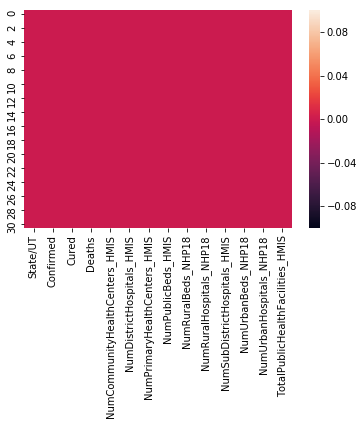

In [209]:
sns.heatmap(CuredVSHospitals.isnull())

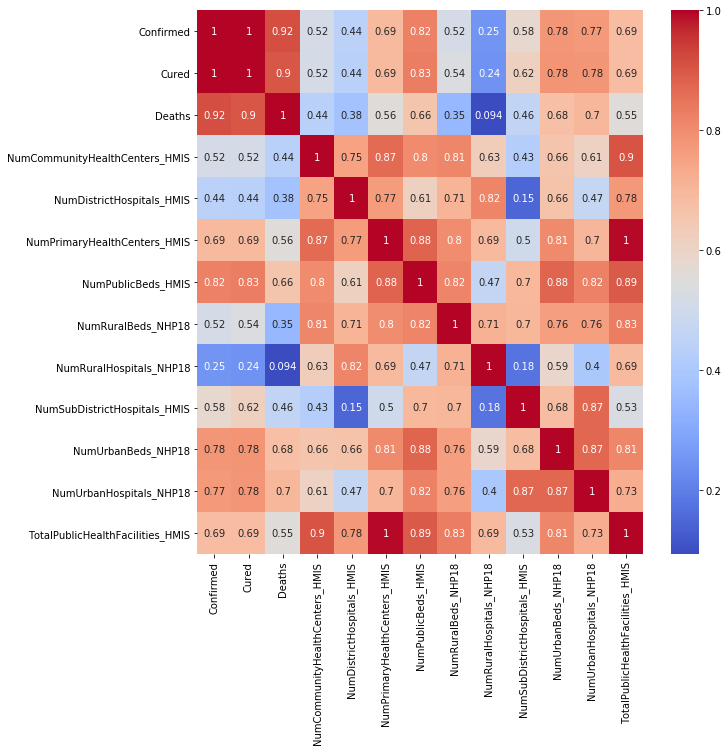

In [210]:
plt.figure(figsize=(10,10))
sns.heatmap(CuredVSHospitals.corr(),cmap='coolwarm',annot=True)

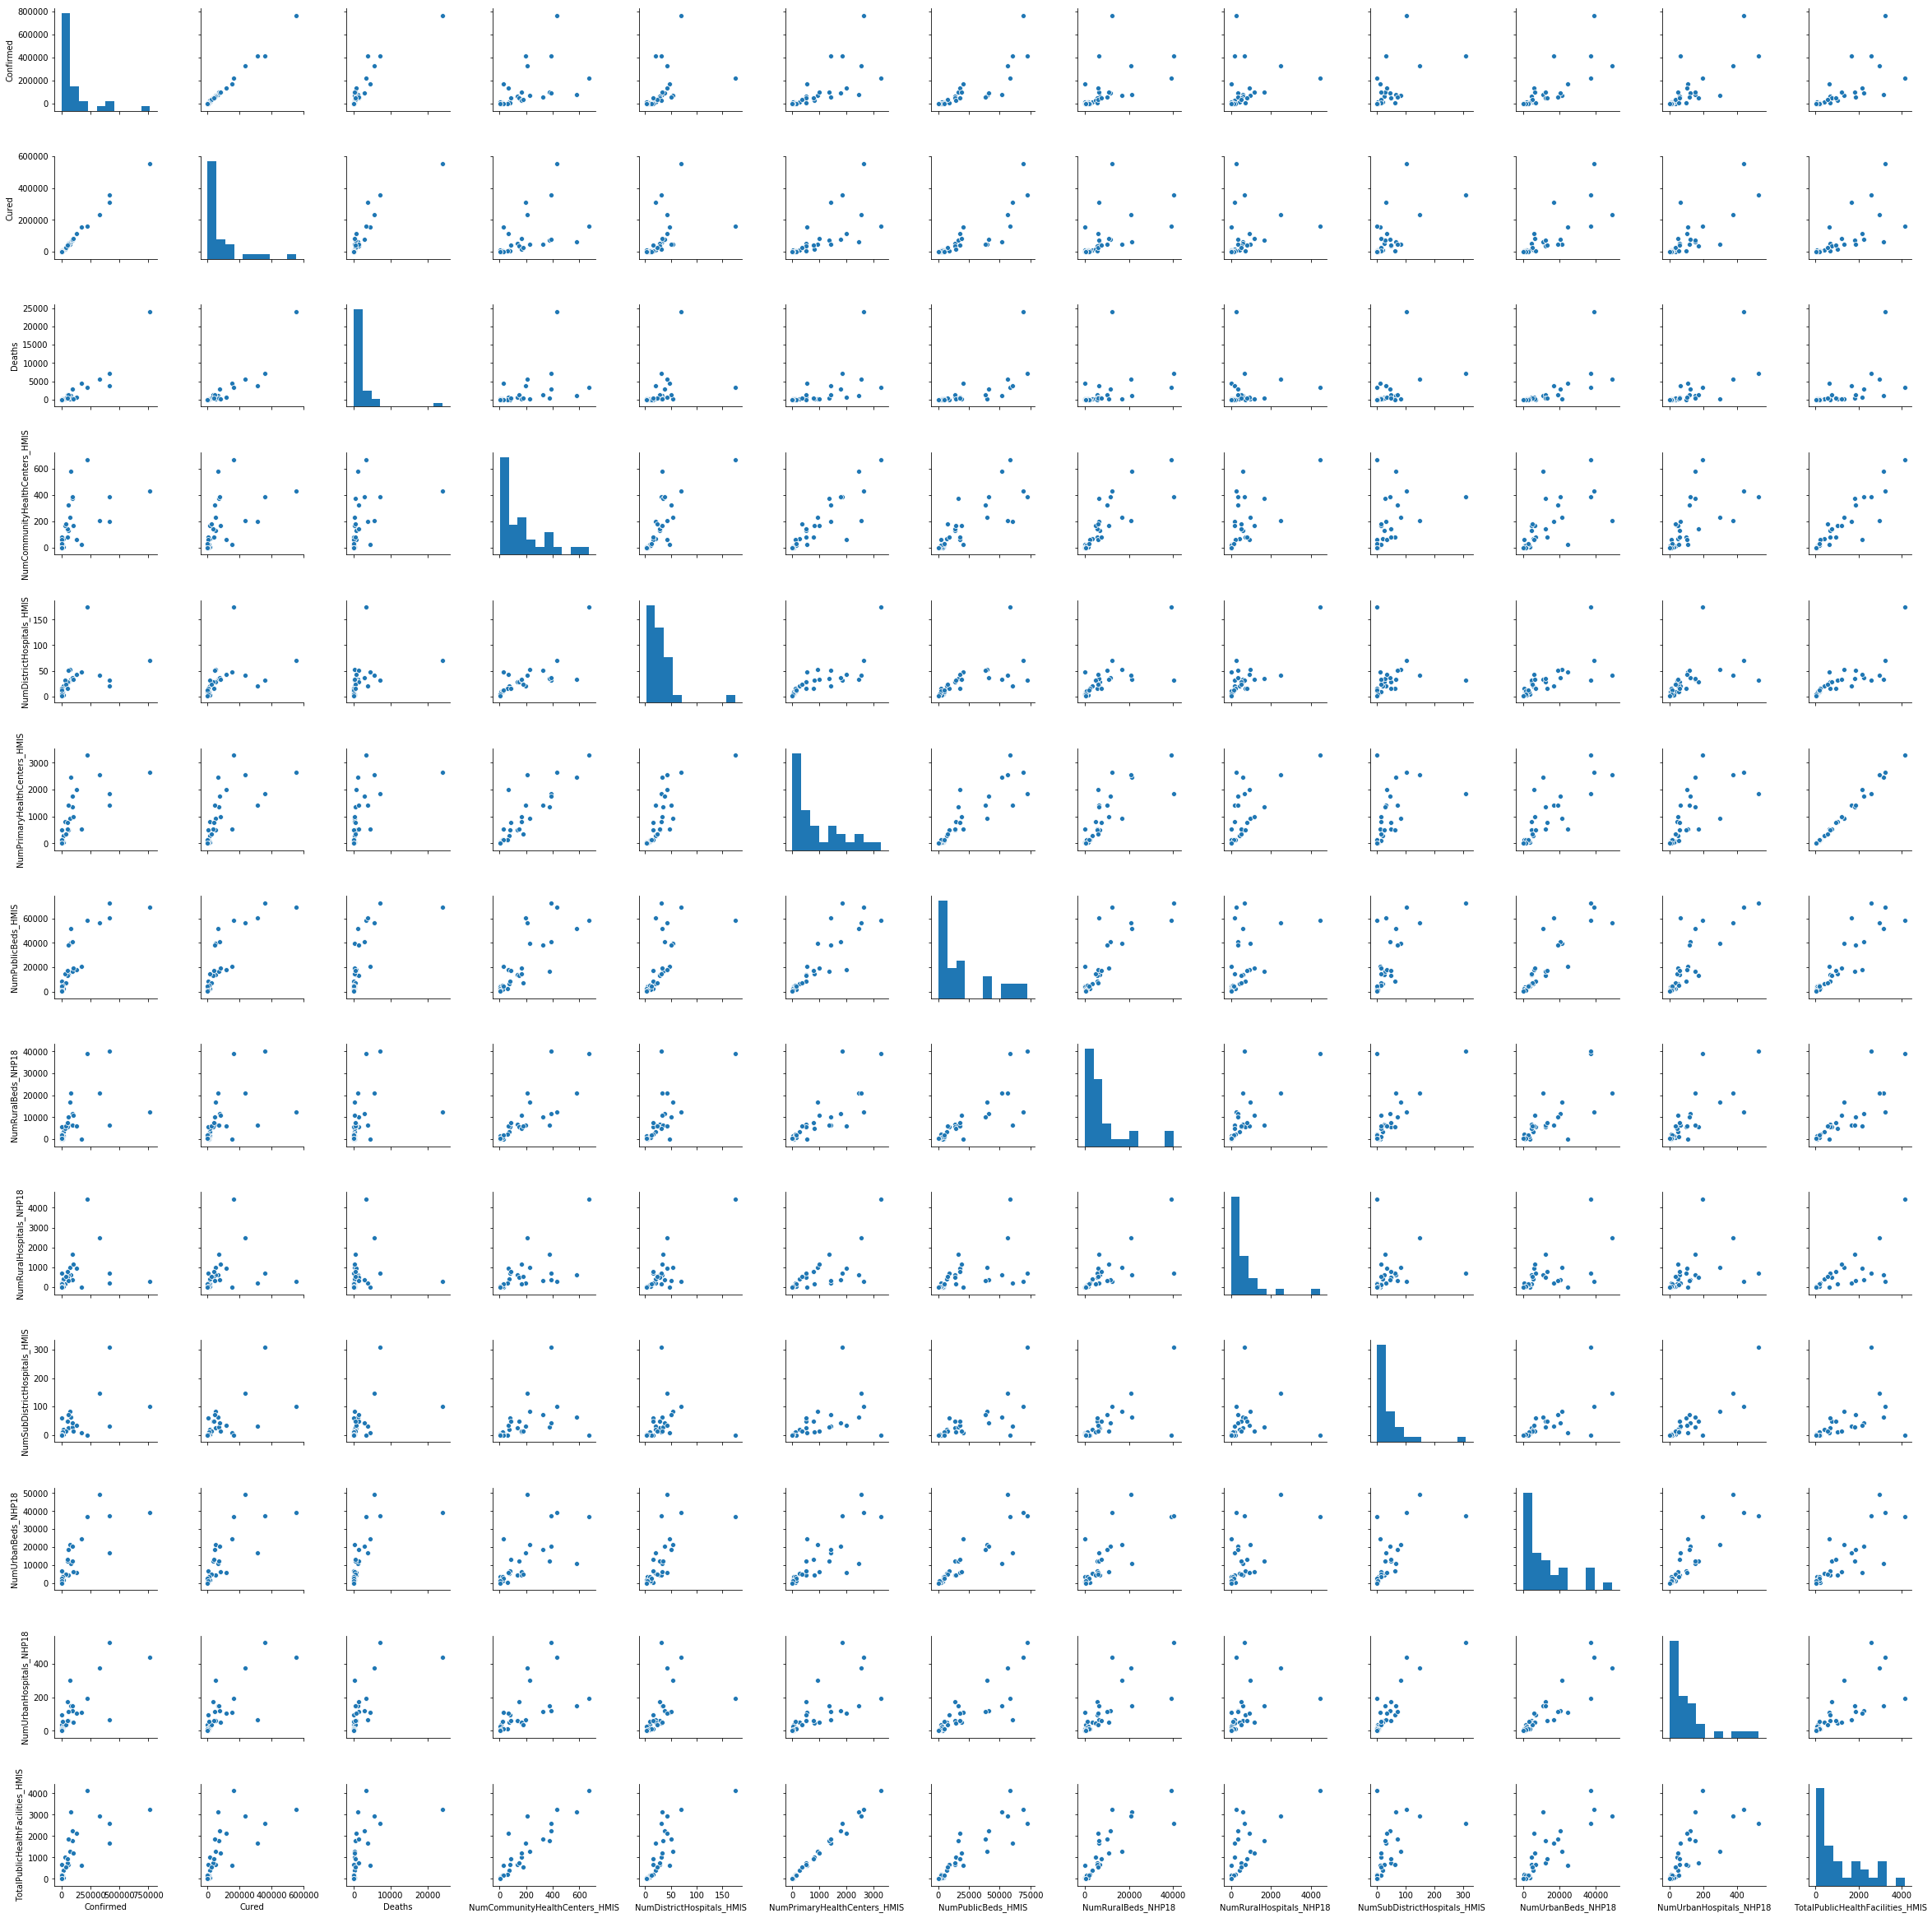

In [211]:
sns.pairplot(CuredVSHospitals)

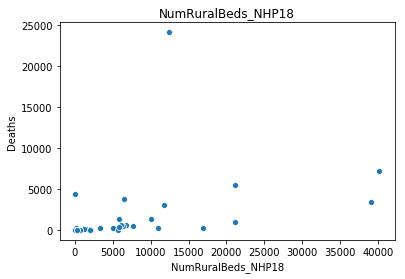

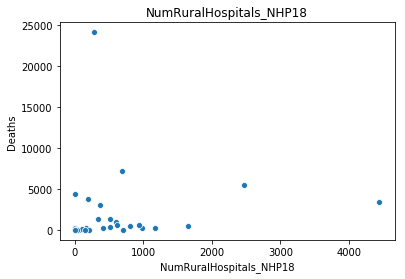

In [212]:
for i in CuredVSHospitals.columns:
    if 'Rural' in i:
        fig, ax = plt.subplots()
        sns.scatterplot(y=CuredVSHospitals['Deaths'],x=CuredVSHospitals[i])
        plt.title(i)

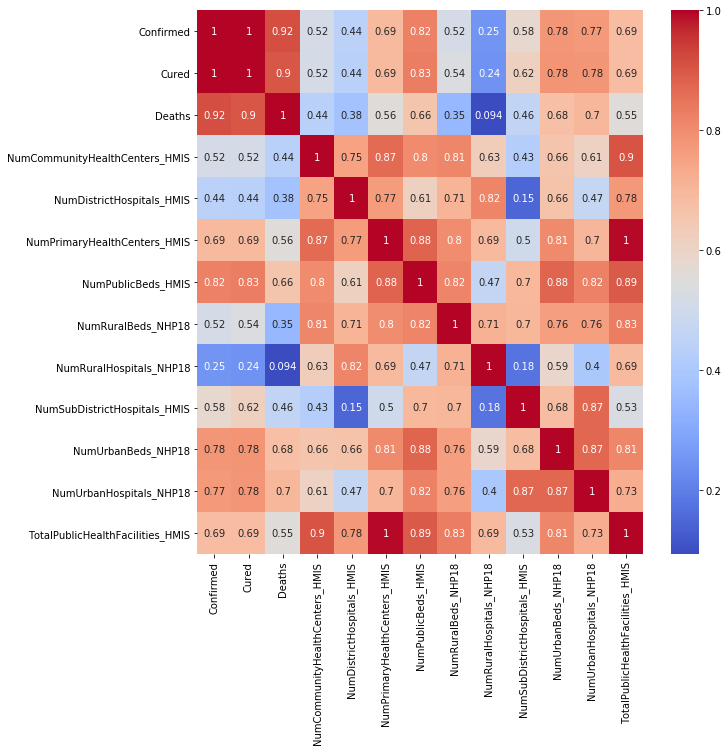

In [213]:
plt.figure(figsize=(10,10))
sns.heatmap(CuredVSHospitals.corr(),cmap='coolwarm',annot=True)

In [214]:
merged

,Sno,Date,Time,State/UT,Cured,Deaths,Confirmed,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18
0,1.0,30/01/20,6:00 PM,Kerala,0.0,0.0,1.0,933.0,229.0,82.0,53.0,1297.0,39511.0,981.0,16865.0,299.0,21139.0
1,2.0,31/01/20,6:00 PM,Kerala,0.0,0.0,1.0,933.0,229.0,82.0,53.0,1297.0,39511.0,981.0,16865.0,299.0,21139.0
2,3.0,01/02/20,6:00 PM,Kerala,0.0,0.0,2.0,933.0,229.0,82.0,53.0,1297.0,39511.0,981.0,16865.0,299.0,21139.0
3,4.0,02/02/20,6:00 PM,Kerala,0.0,0.0,3.0,933.0,229.0,82.0,53.0,1297.0,39511.0,981.0,16865.0,299.0,21139.0
4,5.0,03/02/20,6:00 PM,Kerala,0.0,0.0,3.0,933.0,229.0,82.0,53.0,1297.0,39511.0,981.0,16865.0,299.0,21139.0
5,6.0,04/02/20,6:00 PM,Kerala,0.0,0.0,3.0,933.0,229.0,82.0,53.0,1297.0,39511.0,981.0,16865.0,299.0,21139.0
6,7.0,05/02/20,6:00 PM,Kerala,0.0,0.0,3.0,933.0,229.0,82.0,53.0,1297.0,39511.0,981.0,16865.0,299.0,21139.0
7,8.0,06/02/20,6:00 PM,Kerala,0.0,0.0,3.0,933.0,229.0,82.0,53.0,1297.0,39511.0,981.0,16865.0,299.0,21139.0
8,9.0,07/02/20,6:00 PM,Kerala,0.0,0.0,3.0,933.0,229.0,82.0,53.0,1297.0,39511.0,981.0,16865.0,299.0,21139.0
9,10.0,08/02/20,6:00 PM,Kerala,0.0,0.0,3.0,933.0,229.0,82.0,53.0,1297.0,39511.0,981.0,16865.0,299.0,21139.0


In [215]:
dataset.append(CuredVSHospitals)
names.append('CuredVSHospitals')

In [216]:
names

['ageGroup',
 'covidIndia',
 'hospitalBeds',
 'ICMRLabs',
 'individualDetails',
 'populationCensus',
 'statewiseTesting',
 'CuredVSHospitals']

In [217]:
dataset[3] = ICMRLabs

In [218]:
merged.groupby('Time')['Confirmed'].mean()

Time
10:00 AM       29.181818
5:00 PM       728.822134
6:00 PM        45.906314
7:30 PM        54.413043
8:00 AM     32952.793884
8:30 PM        53.500000
9:30 PM        47.363636
Name: Confirmed, dtype: float64

In [219]:
dataset[-1].head()

,State/UT,Confirmed,Cured,Deaths,NumCommunityHealthCenters_HMIS,NumDistrictHospitals_HMIS,NumPrimaryHealthCenters_HMIS,NumPublicBeds_HMIS,NumRuralBeds_NHP18,NumRuralHospitals_NHP18,NumSubDistrictHospitals_HMIS,NumUrbanBeds_NHP18,NumUrbanHospitals_NHP18,TotalPublicHealthFacilities_HMIS
0,Kerala,71701.0,48079.0,280.0,229.0,53.0,933.0,39511.0,16865.0,981.0,82.0,21139.0,299.0,1297.0
1,Delhi,171366.0,152922.0,4404.0,25.0,47.0,534.0,20572.0,0.0,0.0,9.0,24383.0,109.0,615.0
2,Rajasthan,78777.0,62971.0,1030.0,579.0,33.0,2463.0,51844.0,21088.0,602.0,64.0,10760.0,150.0,3139.0
3,Uttar Pradesh,219457.0,162741.0,3356.0,671.0,174.0,3277.0,58310.0,39104.0,4442.0,0.0,37156.0,193.0,4122.0
4,Haryana,61987.0,50711.0,670.0,131.0,28.0,500.0,13841.0,6690.0,609.0,24.0,4550.0,59.0,683.0


In [220]:
len(dataset[3].address)

267

In [221]:
dataset[3]

,lab,address,pincode,city,state,type
0,"ICMR-Regional Medical Research Centre, Port Blair","ICMR-Regional Medical Research Centre, Post Ba...",744103,Port Blair,Andaman and Nicobar Islands,Government Laboratory
1,Tomo Riba Institute of Health & Medical Scienc...,"National Highway 52A, Old Assembly Complex, Na...",791110,Naharlagun,Arunachal Pradesh,Collection Site
2,Sri Venkateswara Institute of Medical Sciences...,Sri Venkateswara Institute of Medical Sciences...,517507,Tirupati,Andhra Pradesh,Government Laboratory
3,"Rangaraya Medical College, Kakinada","Rangaraya Medical College, Kakinada Pithampura...",533001,Kakinada,Andhra Pradesh,Government Laboratory
4,"Sidhartha Medical College, Vijaywada","Siddhartha Medical College, Vijayawada NH 16 S...",520008,Vijayawada,Andhra Pradesh,Government Laboratory
5,"Government Medical College, Anantapur","Government Medical College, Anantapur, Rahamat...",515001,Anantapur,Andhra Pradesh,Government Laboratory
6,"Guntur Medical College, Guntur","Guntur Medical College, Guntur Kanna Vari Thot...",522004,Guntur,Andhra Pradesh,Government Laboratory
7,Rajeev Gandhi Institute of Medical Sciences (R...,"Rajiv Gandhi Institute of Medical Sciences, Ka...",516002,Puttampalli,Andhra Pradesh,Government Laboratory
8,"Andhra Medical College, Vishakhapatnam","Andhra Medical College, Vishakhapatnam, Medica...",530002,Vishakhapatnam,Andhra Pradesh,Government Laboratory
9,"Gauhati Medical College, Guwahati","Guwahati Narakasur Hilltop, Bhangagarh, Guwaha...",781032,Guwahati,Assam,Government Laboratory


In [222]:
address = []
states = []
for i in dataset[3].address:
    for j in dataset[-1]['State/UT'].unique():
        if j in i:
            states.append(j)
            address.append(i)

In [223]:
states

['Arunachal Pradesh',
 'Andhra Pradesh',
 'Andhra Pradesh',
 'Andhra Pradesh',
 'Andhra Pradesh',
 'Andhra Pradesh',
 'Andhra Pradesh',
 'Andhra Pradesh',
 'Assam',
 'Assam',
 'Assam',
 'Assam',
 'Assam',
 'Assam',
 'Bihar',
 'Bihar',
 'Bihar',
 'Bihar',
 'Bihar',
 'Bihar',
 'Chandigarh',
 'Chandigarh',
 'Chandigarh',
 'Chhattisgarh',
 'Chhattisgarh',
 'Chhattisgarh',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Delhi',
 'Gujarat',
 'Gujarat',
 'Gujarat',
 'Gujarat',
 'Gujarat',
 'Gujarat',
 'Gujarat',
 'Gujarat',
 'Gujarat',
 'Gujarat',
 'Gujarat',
 'Gujarat',
 'Gujarat',
 'Gujarat',
 'Goa',
 'Haryana',
 'Haryana',
 'Haryana',
 'Haryana',
 'Haryana',
 'Haryana',
 'Haryana',
 'Haryana',
 'Haryana',
 'Haryana',
 'Haryana',
 'Himachal Pradesh',
 'Himachal Pradesh',
 'Himachal Pradesh',
 'Jharkhand',
 'Jharkhand',
 'Jharkhand',
 'Karnataka',
 'Karnataka',
 'Karnat

In [224]:
index = []
for i in set(list(dataset[3].address)).difference(set(address)):
    index.append(dataset[3].loc[dataset[3].address==i].index[0])
len(index)

33

In [225]:
dataset[3].drop(index,axis=0,inplace=True)

In [229]:
dataset[3]

,lab,address,pincode,city,State/UT,type
1,Tomo Riba Institute of Health & Medical Scienc...,"National Highway 52A, Old Assembly Complex, Na...",791110,Naharlagun,Arunachal Pradesh,Collection Site
2,Sri Venkateswara Institute of Medical Sciences...,Sri Venkateswara Institute of Medical Sciences...,517507,Tirupati,Andhra Pradesh,Government Laboratory
3,"Rangaraya Medical College, Kakinada","Rangaraya Medical College, Kakinada Pithampura...",533001,Kakinada,Andhra Pradesh,Government Laboratory
4,"Sidhartha Medical College, Vijaywada","Siddhartha Medical College, Vijayawada NH 16 S...",520008,Vijayawada,Andhra Pradesh,Government Laboratory
5,"Government Medical College, Anantapur","Government Medical College, Anantapur, Rahamat...",515001,Anantapur,Andhra Pradesh,Government Laboratory
6,"Guntur Medical College, Guntur","Guntur Medical College, Guntur Kanna Vari Thot...",522004,Guntur,Andhra Pradesh,Government Laboratory
7,Rajeev Gandhi Institute of Medical Sciences (R...,"Rajiv Gandhi Institute of Medical Sciences, Ka...",516002,Puttampalli,Andhra Pradesh,Government Laboratory
8,"Andhra Medical College, Vishakhapatnam","Andhra Medical College, Vishakhapatnam, Medica...",530002,Vishakhapatnam,Andhra Pradesh,Government Laboratory
9,"Gauhati Medical College, Guwahati","Guwahati Narakasur Hilltop, Bhangagarh, Guwaha...",781032,Guwahati,Assam,Government Laboratory
10,"Regional Medical Research Centre, Dibrugarh","Regional Medical Research Centre, Dibrugarh Bo...",786001,Dibrugarh,Assam,Government Laboratory


In [231]:
dataset[3].groupby('State/UT')['type'].value_counts()

State/UT           type                 
Andhra Pradesh     Government Laboratory     7
Arunachal Pradesh  Collection Site           1
Assam              Government Laboratory     6
Bihar              Government Laboratory     6
Chandigarh         Government Laboratory     3
Chhattisgarh       Government Laboratory     3
Delhi              Private Laboratory       10
                   Government Laboratory     8
Goa                Government Laboratory     1
Gujarat            Government Laboratory    10
                   Private Laboratory        4
Haryana            Private Laboratory        6
                   Government Laboratory     5
Himachal Pradesh   Government Laboratory     3
Jharkhand          Government Laboratory     3
Karnataka          Government Laboratory    12
                   Private Laboratory        4
Kerala             Government Laboratory    10
                   Private Laboratory        2
Madhya Pradesh     Government Laboratory     9
                   

In [232]:
dataset[3].rename({'state':'State/UT'},axis=1,inplace=True)

In [233]:
dataset[3]

,lab,address,pincode,city,State/UT,type
1,Tomo Riba Institute of Health & Medical Scienc...,"National Highway 52A, Old Assembly Complex, Na...",791110,Naharlagun,Arunachal Pradesh,Collection Site
2,Sri Venkateswara Institute of Medical Sciences...,Sri Venkateswara Institute of Medical Sciences...,517507,Tirupati,Andhra Pradesh,Government Laboratory
3,"Rangaraya Medical College, Kakinada","Rangaraya Medical College, Kakinada Pithampura...",533001,Kakinada,Andhra Pradesh,Government Laboratory
4,"Sidhartha Medical College, Vijaywada","Siddhartha Medical College, Vijayawada NH 16 S...",520008,Vijayawada,Andhra Pradesh,Government Laboratory
5,"Government Medical College, Anantapur","Government Medical College, Anantapur, Rahamat...",515001,Anantapur,Andhra Pradesh,Government Laboratory
6,"Guntur Medical College, Guntur","Guntur Medical College, Guntur Kanna Vari Thot...",522004,Guntur,Andhra Pradesh,Government Laboratory
7,Rajeev Gandhi Institute of Medical Sciences (R...,"Rajiv Gandhi Institute of Medical Sciences, Ka...",516002,Puttampalli,Andhra Pradesh,Government Laboratory
8,"Andhra Medical College, Vishakhapatnam","Andhra Medical College, Vishakhapatnam, Medica...",530002,Vishakhapatnam,Andhra Pradesh,Government Laboratory
9,"Gauhati Medical College, Guwahati","Guwahati Narakasur Hilltop, Bhangagarh, Guwaha...",781032,Guwahati,Assam,Government Laboratory
10,"Regional Medical Research Centre, Dibrugarh","Regional Medical Research Centre, Dibrugarh Bo...",786001,Dibrugarh,Assam,Government Laboratory


In [234]:
dataset[-1] = CuredVSHospitals

In [235]:
dataset[-1] = dataset[-1].merge(dataset[2],how='outer',on='State/UT')

In [236]:
dataset[3] = dataset[3].merge(dataset[-1],how='outer',on='State/UT')

In [237]:
dataset[3]

,lab,address,pincode,city,State/UT,type,Confirmed,Cured,Deaths,NumCommunityHealthCenters_HMIS_x,...,NumPrimaryHealthCenters_HMIS_y,NumCommunityHealthCenters_HMIS_y,NumSubDistrictHospitals_HMIS_y,NumDistrictHospitals_HMIS_y,TotalPublicHealthFacilities_HMIS_y,NumPublicBeds_HMIS_y,NumRuralHospitals_NHP18_y,NumRuralBeds_NHP18_y,NumUrbanHospitals_NHP18_y,NumUrbanBeds_NHP18_y
0,Tomo Riba Institute of Health & Medical Scienc...,"National Highway 52A, Old Assembly Complex, Na...",791110.0,Naharlagun,Arunachal Pradesh,Collection Site,3877.0,2754.0,5.0,62.0,...,122,62,0.0,15,199,2320,208,2136,10,268
1,Sri Venkateswara Institute of Medical Sciences...,Sri Venkateswara Institute of Medical Sciences...,517507.0,Tirupati,Andhra Pradesh,Government Laboratory,414164.0,312687.0,3796.0,198.0,...,1417,198,31.0,20,1666,60799,193,6480,65,16658
2,"Rangaraya Medical College, Kakinada","Rangaraya Medical College, Kakinada Pithampura...",533001.0,Kakinada,Andhra Pradesh,Government Laboratory,414164.0,312687.0,3796.0,198.0,...,1417,198,31.0,20,1666,60799,193,6480,65,16658
3,"Sidhartha Medical College, Vijaywada","Siddhartha Medical College, Vijayawada NH 16 S...",520008.0,Vijayawada,Andhra Pradesh,Government Laboratory,414164.0,312687.0,3796.0,198.0,...,1417,198,31.0,20,1666,60799,193,6480,65,16658
4,"Government Medical College, Anantapur","Government Medical College, Anantapur, Rahamat...",515001.0,Anantapur,Andhra Pradesh,Government Laboratory,414164.0,312687.0,3796.0,198.0,...,1417,198,31.0,20,1666,60799,193,6480,65,16658
5,"Guntur Medical College, Guntur","Guntur Medical College, Guntur Kanna Vari Thot...",522004.0,Guntur,Andhra Pradesh,Government Laboratory,414164.0,312687.0,3796.0,198.0,...,1417,198,31.0,20,1666,60799,193,6480,65,16658
6,Rajeev Gandhi Institute of Medical Sciences (R...,"Rajiv Gandhi Institute of Medical Sciences, Ka...",516002.0,Puttampalli,Andhra Pradesh,Government Laboratory,414164.0,312687.0,3796.0,198.0,...,1417,198,31.0,20,1666,60799,193,6480,65,16658
7,"Andhra Medical College, Vishakhapatnam","Andhra Medical College, Vishakhapatnam, Medica...",530002.0,Vishakhapatnam,Andhra Pradesh,Government Laboratory,414164.0,312687.0,3796.0,198.0,...,1417,198,31.0,20,1666,60799,193,6480,65,16658
8,"Gauhati Medical College, Guwahati","Guwahati Narakasur Hilltop, Bhangagarh, Guwaha...",781032.0,Guwahati,Assam,Government Laboratory,103794.0,82510.0,289.0,166.0,...,1007,166,14.0,33,1220,19115,1176,10944,50,6198
9,"Regional Medical Research Centre, Dibrugarh","Regional Medical Research Centre, Dibrugarh Bo...",786001.0,Dibrugarh,Assam,Government Laboratory,103794.0,82510.0,289.0,166.0,...,1007,166,14.0,33,1220,19115,1176,10944,50,6198


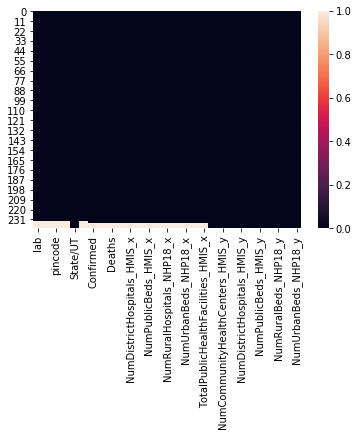

In [238]:
sns.heatmap(dataset[3].isnull())

In [239]:
dataset[3].isnull().sum()

lab                                   7
address                               7
pincode                               7
city                                  7
State/UT                              0
type                                  7
Confirmed                             5
Cured                                 5
Deaths                                5
NumCommunityHealthCenters_HMIS_x      5
NumDistrictHospitals_HMIS_x           5
NumPrimaryHealthCenters_HMIS_x        5
NumPublicBeds_HMIS_x                  5
NumRuralBeds_NHP18_x                  5
NumRuralHospitals_NHP18_x             5
NumSubDistrictHospitals_HMIS_x        5
NumUrbanBeds_NHP18_x                  5
NumUrbanHospitals_NHP18_x             5
TotalPublicHealthFacilities_HMIS_x    5
NumPrimaryHealthCenters_HMIS_y        0
NumCommunityHealthCenters_HMIS_y      0
NumSubDistrictHospitals_HMIS_y        0
NumDistrictHospitals_HMIS_y           0
TotalPublicHealthFacilities_HMIS_y    0
NumPublicBeds_HMIS_y                  0


In [241]:
dataset[3].dropna(axis=0,inplace=True)

In [242]:
dataset[3].fillna('Not Available',axis=0,inplace=True)

In [243]:
pd.set_option('display.max_columns',100)

In [244]:
dataset[3]

,lab,address,pincode,city,State/UT,type,Confirmed,Cured,Deaths,NumCommunityHealthCenters_HMIS_x,NumDistrictHospitals_HMIS_x,NumPrimaryHealthCenters_HMIS_x,NumPublicBeds_HMIS_x,NumRuralBeds_NHP18_x,NumRuralHospitals_NHP18_x,NumSubDistrictHospitals_HMIS_x,NumUrbanBeds_NHP18_x,NumUrbanHospitals_NHP18_x,TotalPublicHealthFacilities_HMIS_x,NumPrimaryHealthCenters_HMIS_y,NumCommunityHealthCenters_HMIS_y,NumSubDistrictHospitals_HMIS_y,NumDistrictHospitals_HMIS_y,TotalPublicHealthFacilities_HMIS_y,NumPublicBeds_HMIS_y,NumRuralHospitals_NHP18_y,NumRuralBeds_NHP18_y,NumUrbanHospitals_NHP18_y,NumUrbanBeds_NHP18_y
0,Tomo Riba Institute of Health & Medical Scienc...,"National Highway 52A, Old Assembly Complex, Na...",791110.0,Naharlagun,Arunachal Pradesh,Collection Site,3877.0,2754.0,5.0,62.0,15.0,122.0,2320.0,2136.0,208.0,0.0,268.0,10.0,199.0,122,62,0.0,15,199,2320,208,2136,10,268
1,Sri Venkateswara Institute of Medical Sciences...,Sri Venkateswara Institute of Medical Sciences...,517507.0,Tirupati,Andhra Pradesh,Government Laboratory,414164.0,312687.0,3796.0,198.0,20.0,1417.0,60799.0,6480.0,193.0,31.0,16658.0,65.0,1666.0,1417,198,31.0,20,1666,60799,193,6480,65,16658
2,"Rangaraya Medical College, Kakinada","Rangaraya Medical College, Kakinada Pithampura...",533001.0,Kakinada,Andhra Pradesh,Government Laboratory,414164.0,312687.0,3796.0,198.0,20.0,1417.0,60799.0,6480.0,193.0,31.0,16658.0,65.0,1666.0,1417,198,31.0,20,1666,60799,193,6480,65,16658
3,"Sidhartha Medical College, Vijaywada","Siddhartha Medical College, Vijayawada NH 16 S...",520008.0,Vijayawada,Andhra Pradesh,Government Laboratory,414164.0,312687.0,3796.0,198.0,20.0,1417.0,60799.0,6480.0,193.0,31.0,16658.0,65.0,1666.0,1417,198,31.0,20,1666,60799,193,6480,65,16658
4,"Government Medical College, Anantapur","Government Medical College, Anantapur, Rahamat...",515001.0,Anantapur,Andhra Pradesh,Government Laboratory,414164.0,312687.0,3796.0,198.0,20.0,1417.0,60799.0,6480.0,193.0,31.0,16658.0,65.0,1666.0,1417,198,31.0,20,1666,60799,193,6480,65,16658
5,"Guntur Medical College, Guntur","Guntur Medical College, Guntur Kanna Vari Thot...",522004.0,Guntur,Andhra Pradesh,Government Laboratory,414164.0,312687.0,3796.0,198.0,20.0,1417.0,60799.0,6480.0,193.0,31.0,16658.0,65.0,1666.0,1417,198,31.0,20,1666,60799,193,6480,65,16658
6,Rajeev Gandhi Institute of Medical Sciences (R...,"Rajiv Gandhi Institute of Medical Sciences, Ka...",516002.0,Puttampalli,Andhra Pradesh,Government Laboratory,414164.0,312687.0,3796.0,198.0,20.0,1417.0,60799.0,6480.0,193.0,31.0,16658.0,65.0,1666.0,1417,198,31.0,20,1666,60799,193,6480,65,16658
7,"Andhra Medical College, Vishakhapatnam","Andhra Medical College, Vishakhapatnam, Medica...",530002.0,Vishakhapatnam,Andhra Pradesh,Government Laboratory,414164.0,312687.0,3796.0,198.0,20.0,1417.0,60799.0,6480.0,193.0,31.0,16658.0,65.0,1666.0,1417,198,31.0,20,1666,60799,193,6480,65,16658
8,"Gauhati Medical College, Guwahati","Guwahati Narakasur Hilltop, Bhangagarh, Guwaha...",781032.0,Guwahati,Assam,Government Laboratory,103794.0,82510.0,289.0,166.0,33.0,1007.0,19115.0,10944.0,1176.0,14.0,6198.0,50.0,1220.0,1007,166,14.0,33,1220,19115,1176,10944,50,6198
9,"Regional Medical Research Centre, Dibrugarh","Regional Medical Research Centre, Dibrugarh Bo...",786001.0,Dibrugarh,Assam,Government Laboratory,103794.0,82510.0,289.0,166.0,33.0,1007.0,19115.0,10944.0,1176.0,14.0,6198.0,50.0,1220.0,1007,166,14.0,33,1220,19115,1176,10944,50,6198


In [245]:
dataset[3].groupby('type')['Confirmed'].mean()

type
Collection Site            2739.500000
Government Laboratory    221360.969136
Private Laboratory       311675.085714
Name: Confirmed, dtype: float64

In [246]:
d = {}
for i in dataset[3]['State/UT']:
    if i in d:
        d[i] += 1
    else:
        d[i] = 1

In [247]:
d

{'Arunachal Pradesh': 1,
 'Andhra Pradesh': 7,
 'Assam': 6,
 'Bihar': 6,
 'Chandigarh': 3,
 'Chhattisgarh': 3,
 'Delhi': 18,
 'Gujarat': 14,
 'Goa': 1,
 'Haryana': 11,
 'Himachal Pradesh': 3,
 'Jharkhand': 3,
 'Karnataka': 16,
 'Kerala': 12,
 'Maharashtra': 34,
 'Madhya Pradesh': 10,
 'Manipur': 2,
 'Meghalaya': 1,
 'Mizoram': 1,
 'Odisha': 7,
 'Puducherry': 1,
 'Punjab': 5,
 'Rajasthan': 9,
 'Sikkim': 1,
 'Tamil Nadu': 23,
 'Telangana': 18,
 'Tripura': 1,
 'Uttar Pradesh': 14,
 'Uttarakhand': 3}

In [248]:
names[4]

'individualDetails'

In [250]:
dataset[4]

,diagnosed_date,age,gender,detected_city,detected_district,detected_state,nationality,current_status,status_change_date,notes
0,30/01/2020,20,F,Thrissur,Thrissur,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
1,02/02/2020,Not Known,Not Known,Alappuzha,Alappuzha,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
2,03/02/2020,Not Known,Not Known,Kasaragod,Kasaragod,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
3,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,India,Recovered,15/03/2020,"Travelled from Austria, Italy"
4,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,India,Recovered,02/03/2020,"Travelled from Dubai to Bangalore on 20th Feb,..."
5,03/03/2020,69,M,Jaipur,Italians,Rajasthan,Italy,Recovered,03/03/2020,Travelled from Italy
6,04/03/2020,55,Not Known,Gurugram,Italians,Haryana,Italy,Recovered,29/03/2020,Travelled from Italy
7,04/03/2020,55,Not Known,Gurugram,Italians,Haryana,Italy,Recovered,29/03/2020,Travelled from Italy
8,04/03/2020,55,Not Known,Gurugram,Italians,Haryana,Italy,Recovered,29/03/2020,Travelled from Italy
9,04/03/2020,55,Not Known,Gurugram,Italians,Haryana,Italy,Recovered,29/03/2020,Travelled from Italy


In [266]:
pd.read_csv('IndividualDetails.csv').dropna().groupby('detected_state')

In [183]:
dataset[1].groupby('Time')['Deaths'].mean()

Time
10:00 AM      0.629630
5:00 PM      21.545050
6:00 PM       1.000000
7:30 PM       1.214286
8:00 AM     652.109276
8:30 PM       1.250000
9:30 PM       1.107143
Name: Deaths, dtype: float64

In [184]:
dict(dataset[4].groupby('current_status')['notes'].value_counts())

{('Deceased', 'Details awaited'): 3,
 ('Deceased', 'SARI'): 3,
 ('Deceased', 'Details Awaited'): 2,
 ('Deceased', 'Local Transmission'): 2,
 ('Deceased', 'Not Known'): 2,
 ('Deceased', 'Admit Noble Hospital on 2nd April, 2020'): 1,
 ('Deceased', 'Admit to Naidu Hospital on 4th April, 2020'): 1,
 ('Deceased', 'Admitted to Noble hospital'): 1,
 ('Deceased', 'Admitted to Sassoon Hospital'): 1,
 ('Deceased', 'Admitted to Sassoon Hospital on 15th April, 2020'): 1,
 ('Deceased', 'Admitted to saassoon hospital'): 1,
 ('Deceased',
  'Annanagar at Rajaji Hosp. No mention of travel history. Came in contact with some Thailand nationals who were on tour in the state.'): 1,
 ('Deceased', 'Contact of KA-P306 and KA-P308'): 1,
 ('Deceased', 'Contact of P224'): 1,
 ('Deceased', 'From Malegaon. Multiple Ailments'): 1,
 ('Deceased',
  'Had been admitted to AIIMS Bhubaneswar on 4th April with complaint of respiratory distress. He had history of chronic hypertension'): 1,
 ('Deceased', 'History of SARI'):

In [185]:
d = dict(dataset[4].groupby('notes')['current_status'].value_counts())

In [186]:
sorted(d.items(), key=lambda x: x[1])

[((' Mohalla Clinic Doctor (Contact Transmission 800+ contacts quarantined)',
   'Hospitalized'),
  1),
 (('(Sec 137) Contact Transmission (Parents found positive 2 days ago)',
   'Hospitalized'),
  1),
 (('(Sec 150) Husband of P677 (Colleague travelled from UK already tested positive )',
   'Hospitalized'),
  1),
 (('(Sec 150) Wife of P676', 'Hospitalized'), 1),
 (('(foreign travel from UK likely)', 'Hospitalized'), 1),
 (('2nd case confirmed in Dharavi', 'Hospitalized'), 1),
 (('3 year old from Kalyan, Father P95 /Mother P122', 'Hospitalized'), 1),
 (('A 50-year-old man, a railway guard, tested positive at the All India Institute of Medical Sciences, Bhopal',
   'Hospitalized'),
  1),
 (('A Retired Army Officer,  Wife had earlier tested positive today. They are residents of Gomti Nagar',
   'Hospitalized'),
  1),
 (('A relative who came from Italy visited them.', 'Hospitalized'), 1),
 (('Accompanied the Italian tourists, Nationality: Indian', 'Hospitalized'),
  1),
 (('Admit Noble Ho

In [187]:
pd.set_option('display.max_row',None)

In [188]:
arr1,arr2 = np.where(individualDetails.isnull())
individualDetails.fillna('No Data').groupby('detected_state')['nationality'].value_counts()

detected_state               nationality                      
Andaman and Nicobar Islands  Not Known                              26
                             India                                   7
Andhra Pradesh               Not Known                            1090
                             India                                  13
Arunachal Pradesh            India                                   1
Assam                        Not Known                              34
                             India                                   2
Bihar                        Not Known                             253
                             India                                  24
Chandigarh                   Not Known                              28
                             India                                   8
Chhattisgarh                 Not Known                              33
                             India                                   4
Delhi         

In [189]:
individualDetails.loc[(individualDetails.age=='28-35'),['age']] = '30.5'

In [194]:
individualDetails.head()

,diagnosed_date,age,gender,detected_city,detected_district,detected_state,nationality,current_status,status_change_date,notes
0,30/01/2020,20,F,Thrissur,Thrissur,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
1,02/02/2020,Not Known,Not Known,Alappuzha,Alappuzha,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
2,03/02/2020,Not Known,Not Known,Kasaragod,Kasaragod,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
3,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,India,Recovered,15/03/2020,"Travelled from Austria, Italy"
4,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,India,Recovered,02/03/2020,"Travelled from Dubai to Bangalore on 20th Feb,..."


In [195]:
individualDetails.detected_city.fillna('No Data',inplace=True)
individualDetails.detected_district.fillna('No Data',inplace=True)
individualDetails.nationality.fillna('No Data',inplace=True)
individualDetails.notes.fillna('Not applicable',inplace=True)
individualDetails.detected_city.fillna('No Data',inplace=True)

In [196]:
pd.set_option('display.max_rows',100)
individualDetails.age

0               20
1        Not Known
2        Not Known
3               45
4               24
5               69
6               55
7               55
8               55
9               55
10              55
11              55
12              55
13              55
14              55
15              55
16              55
17              55
18              55
19              55
20              70
21       Not Known
22       Not Known
23              45
24       Not Known
25              16
26       Not Known
27       Not Known
28              27
29              59
30       Not Known
31              65
32              75
33              45
34              24
35              54
36              53
37              65
38              61
39              25
40              63
41              46
42               3
43       Not Known
44       Not Known
45       Not Known
46              48
47       Not Known
48       Not Known
49       Not Known
           ...    
28132    Not Known
28133    Not

In [198]:
dataset[5]

,Sno,State / Union Territory,Population,Rural population,Urban population,Area,Density,Gender Ratio
0,1,Uttar Pradesh,199812341,155317278,44495063,"240,928 km2 (93,023 sq mi)","828/km2 (2,140/sq mi)",912
1,2,Maharashtra,112374333,61556074,50818259,"307,713 km2 (118,809 sq mi)",365/km2 (950/sq mi),929
2,3,Bihar,104099452,92341436,11758016,"94,163 km2 (36,357 sq mi)","1,102/km2 (2,850/sq mi)",918
3,4,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953
4,5,Madhya Pradesh,72626809,52557404,20069405,"308,245 km2 (119,014 sq mi)",236/km2 (610/sq mi),931
5,6,Tamil Nadu,72147030,37229590,34917440,"130,058 km2 (50,216 sq mi)","555/km2 (1,440/sq mi)",996
6,7,Rajasthan,68548437,51500352,17048085,"342,239 km2 (132,139 sq mi)",201/km2 (520/sq mi),928
7,8,Karnataka,61095297,37469335,23625962,"191,791 km2 (74,051 sq mi)",319/km2 (830/sq mi),973
8,9,Gujarat,60439692,34694609,25745083,"196,024 km2 (75,685 sq mi)",308/km2 (800/sq mi),919
9,10,Andhra Pradesh,49577103,34966693,14610410,"162,968 km2 (62,922 sq mi)",303/km2 (780/sq mi),993


In [199]:
dataset[5].rename({'State / Union Territory':'State/UT'},axis=1,inplace=True)

In [200]:
dataset[-1]

,Confirmed,Cured,Deaths,State/UT,NumCommunityHealthCenters_HMIS_x,NumDistrictHospitals_HMIS_x,NumPrimaryHealthCenters_HMIS_x,NumPublicBeds_HMIS_x,NumRuralBeds_NHP18_x,NumRuralHospitals_NHP18_x,NumSubDistrictHospitals_HMIS_x,NumUrbanBeds_NHP18_x,NumUrbanHospitals_NHP18_x,TotalPublicHealthFacilities_HMIS_x,NumPrimaryHealthCenters_HMIS_y,NumCommunityHealthCenters_HMIS_y,NumSubDistrictHospitals_HMIS_y,NumDistrictHospitals_HMIS_y,TotalPublicHealthFacilities_HMIS_y,NumPublicBeds_HMIS_y,NumRuralHospitals_NHP18_y,NumRuralBeds_NHP18_y,NumUrbanHospitals_NHP18_y,NumUrbanBeds_NHP18_y
0,71701.0,48079.0,280.0,Kerala,229.0,53.0,933.0,39511.0,16865.0,981.0,82.0,21139.0,299.0,1297.0,933,229,82.0,53,1297,39511,981,16865,299,21139
1,171366.0,152922.0,4404.0,Delhi,25.0,47.0,534.0,20572.0,0.0,0.0,9.0,24383.0,109.0,615.0,534,25,9.0,47,615,20572,0,0,109,24383
2,78777.0,62971.0,1030.0,Rajasthan,579.0,33.0,2463.0,51844.0,21088.0,602.0,64.0,10760.0,150.0,3139.0,2463,579,64.0,33,3139,51844,602,21088,150,10760
3,219457.0,162741.0,3356.0,Uttar Pradesh,671.0,174.0,3277.0,58310.0,39104.0,4442.0,0.0,37156.0,193.0,4122.0,3277,671,0.0,174,4122,58310,4442,39104,193,37156
4,61987.0,50711.0,670.0,Haryana,131.0,28.0,500.0,13841.0,6690.0,609.0,24.0,4550.0,59.0,683.0,500,131,24.0,28,683,13841,609,6690,59,4550
5,415590.0,355727.0,7137.0,Tamil Nadu,385.0,32.0,1854.0,72616.0,40179.0,692.0,310.0,37353.0,525.0,2581.0,1854,385,310.0,32,2581,72616,692,40179,525,37353
6,327076.0,235128.0,5483.0,Karnataka,207.0,42.0,2547.0,56333.0,21072.0,2471.0,147.0,49093.0,374.0,2943.0,2547,207,147.0,42,2943,56333,2471,21072,374,49093
7,764281.0,554711.0,24103.0,Maharashtra,430.0,70.0,2638.0,68998.0,12398.0,273.0,101.0,39048.0,438.0,3239.0,2638,430,101.0,70,3239,68998,273,12398,438,39048
8,50848.0,34091.0,1348.0,Punjab,146.0,28.0,521.0,13527.0,5805.0,510.0,47.0,12128.0,172.0,742.0,521,146,47.0,28,742,13527,510,5805,172,12128
9,414164.0,312687.0,3796.0,Andhra Pradesh,198.0,20.0,1417.0,60799.0,6480.0,193.0,31.0,16658.0,65.0,1666.0,1417,198,31.0,20,1666,60799,193,6480,65,16658


In [201]:
dataset[5] = dataset[5].merge(dataset[-1],how='inner',on='State/UT')

In [202]:
dataset[5].drop(['Sno'],axis=1,inplace=True)

In [203]:
dataset[5]

,State/UT,Population,Rural population,Urban population,Area,Density,Gender Ratio,Confirmed,Cured,Deaths,NumCommunityHealthCenters_HMIS_x,NumDistrictHospitals_HMIS_x,NumPrimaryHealthCenters_HMIS_x,NumPublicBeds_HMIS_x,NumRuralBeds_NHP18_x,NumRuralHospitals_NHP18_x,NumSubDistrictHospitals_HMIS_x,NumUrbanBeds_NHP18_x,NumUrbanHospitals_NHP18_x,TotalPublicHealthFacilities_HMIS_x,NumPrimaryHealthCenters_HMIS_y,NumCommunityHealthCenters_HMIS_y,NumSubDistrictHospitals_HMIS_y,NumDistrictHospitals_HMIS_y,TotalPublicHealthFacilities_HMIS_y,NumPublicBeds_HMIS_y,NumRuralHospitals_NHP18_y,NumRuralBeds_NHP18_y,NumUrbanHospitals_NHP18_y,NumUrbanBeds_NHP18_y
0,Uttar Pradesh,199812341,155317278,44495063,"240,928 km2 (93,023 sq mi)","828/km2 (2,140/sq mi)",912,219457.0,162741.0,3356.0,671.0,174.0,3277.0,58310.0,39104.0,4442.0,0.0,37156.0,193.0,4122.0,3277,671,0.0,174,4122,58310,4442,39104,193,37156
1,Maharashtra,112374333,61556074,50818259,"307,713 km2 (118,809 sq mi)",365/km2 (950/sq mi),929,764281.0,554711.0,24103.0,430.0,70.0,2638.0,68998.0,12398.0,273.0,101.0,39048.0,438.0,3239.0,2638,430,101.0,70,3239,68998,273,12398,438,39048
2,Bihar,104099452,92341436,11758016,"94,163 km2 (36,357 sq mi)","1,102/km2 (2,850/sq mi)",918,133003.0,114772.0,561.0,63.0,43.0,2007.0,17796.0,6083.0,930.0,33.0,5936.0,103.0,2146.0,2007,63,33.0,43,2146,17796,930,6083,103,5936
3,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1374,406,70.0,55,1905,51163,1272,19684,294,58882
4,Madhya Pradesh,72626809,52557404,20069405,"308,245 km2 (119,014 sq mi)",236/km2 (610/sq mi),931,60875.0,46413.0,1345.0,324.0,51.0,1420.0,38140.0,10020.0,334.0,72.0,18819.0,117.0,1867.0,1420,324,72.0,51,1867,38140,334,10020,117,18819
5,Tamil Nadu,72147030,37229590,34917440,"130,058 km2 (50,216 sq mi)","555/km2 (1,440/sq mi)",996,415590.0,355727.0,7137.0,385.0,32.0,1854.0,72616.0,40179.0,692.0,310.0,37353.0,525.0,2581.0,1854,385,310.0,32,2581,72616,692,40179,525,37353
6,Rajasthan,68548437,51500352,17048085,"342,239 km2 (132,139 sq mi)",201/km2 (520/sq mi),928,78777.0,62971.0,1030.0,579.0,33.0,2463.0,51844.0,21088.0,602.0,64.0,10760.0,150.0,3139.0,2463,579,64.0,33,3139,51844,602,21088,150,10760
7,Karnataka,61095297,37469335,23625962,"191,791 km2 (74,051 sq mi)",319/km2 (830/sq mi),973,327076.0,235128.0,5483.0,207.0,42.0,2547.0,56333.0,21072.0,2471.0,147.0,49093.0,374.0,2943.0,2547,207,147.0,42,2943,56333,2471,21072,374,49093
8,Gujarat,60439692,34694609,25745083,"196,024 km2 (75,685 sq mi)",308/km2 (800/sq mi),919,93734.0,75636.0,2989.0,385.0,37.0,1770.0,41129.0,11715.0,364.0,44.0,20565.0,122.0,2236.0,1770,385,44.0,37,2236,41129,364,11715,122,20565
9,Andhra Pradesh,49577103,34966693,14610410,"162,968 km2 (62,922 sq mi)",303/km2 (780/sq mi),993,414164.0,312687.0,3796.0,198.0,20.0,1417.0,60799.0,6480.0,193.0,31.0,16658.0,65.0,1666.0,1417,198,31.0,20,1666,60799,193,6480,65,16658


In [204]:
len(dataset[5]['State/UT'].unique())

31

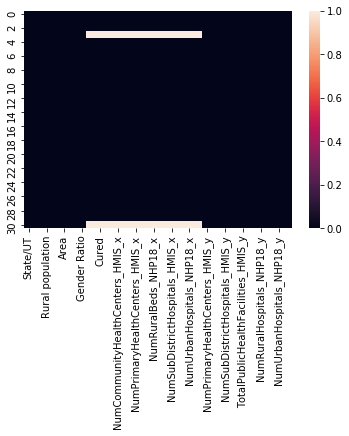

In [205]:
sns.heatmap(dataset[5].isnull())

In [206]:
np.where(dataset[5].isnull())

(array([ 3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3, 30, 30, 30, 30,
        30, 30, 30, 30, 30, 30, 30, 30, 30], dtype=int64),
 array([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  7,  8,  9, 10,
        11, 12, 13, 14, 15, 16, 17, 18, 19], dtype=int64))

In [207]:
dataset[5]

,State/UT,Population,Rural population,Urban population,Area,Density,Gender Ratio,Confirmed,Cured,Deaths,NumCommunityHealthCenters_HMIS_x,NumDistrictHospitals_HMIS_x,NumPrimaryHealthCenters_HMIS_x,NumPublicBeds_HMIS_x,NumRuralBeds_NHP18_x,NumRuralHospitals_NHP18_x,NumSubDistrictHospitals_HMIS_x,NumUrbanBeds_NHP18_x,NumUrbanHospitals_NHP18_x,TotalPublicHealthFacilities_HMIS_x,NumPrimaryHealthCenters_HMIS_y,NumCommunityHealthCenters_HMIS_y,NumSubDistrictHospitals_HMIS_y,NumDistrictHospitals_HMIS_y,TotalPublicHealthFacilities_HMIS_y,NumPublicBeds_HMIS_y,NumRuralHospitals_NHP18_y,NumRuralBeds_NHP18_y,NumUrbanHospitals_NHP18_y,NumUrbanBeds_NHP18_y
0,Uttar Pradesh,199812341,155317278,44495063,"240,928 km2 (93,023 sq mi)","828/km2 (2,140/sq mi)",912,219457.0,162741.0,3356.0,671.0,174.0,3277.0,58310.0,39104.0,4442.0,0.0,37156.0,193.0,4122.0,3277,671,0.0,174,4122,58310,4442,39104,193,37156
1,Maharashtra,112374333,61556074,50818259,"307,713 km2 (118,809 sq mi)",365/km2 (950/sq mi),929,764281.0,554711.0,24103.0,430.0,70.0,2638.0,68998.0,12398.0,273.0,101.0,39048.0,438.0,3239.0,2638,430,101.0,70,3239,68998,273,12398,438,39048
2,Bihar,104099452,92341436,11758016,"94,163 km2 (36,357 sq mi)","1,102/km2 (2,850/sq mi)",918,133003.0,114772.0,561.0,63.0,43.0,2007.0,17796.0,6083.0,930.0,33.0,5936.0,103.0,2146.0,2007,63,33.0,43,2146,17796,930,6083,103,5936
3,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1374,406,70.0,55,1905,51163,1272,19684,294,58882
4,Madhya Pradesh,72626809,52557404,20069405,"308,245 km2 (119,014 sq mi)",236/km2 (610/sq mi),931,60875.0,46413.0,1345.0,324.0,51.0,1420.0,38140.0,10020.0,334.0,72.0,18819.0,117.0,1867.0,1420,324,72.0,51,1867,38140,334,10020,117,18819
5,Tamil Nadu,72147030,37229590,34917440,"130,058 km2 (50,216 sq mi)","555/km2 (1,440/sq mi)",996,415590.0,355727.0,7137.0,385.0,32.0,1854.0,72616.0,40179.0,692.0,310.0,37353.0,525.0,2581.0,1854,385,310.0,32,2581,72616,692,40179,525,37353
6,Rajasthan,68548437,51500352,17048085,"342,239 km2 (132,139 sq mi)",201/km2 (520/sq mi),928,78777.0,62971.0,1030.0,579.0,33.0,2463.0,51844.0,21088.0,602.0,64.0,10760.0,150.0,3139.0,2463,579,64.0,33,3139,51844,602,21088,150,10760
7,Karnataka,61095297,37469335,23625962,"191,791 km2 (74,051 sq mi)",319/km2 (830/sq mi),973,327076.0,235128.0,5483.0,207.0,42.0,2547.0,56333.0,21072.0,2471.0,147.0,49093.0,374.0,2943.0,2547,207,147.0,42,2943,56333,2471,21072,374,49093
8,Gujarat,60439692,34694609,25745083,"196,024 km2 (75,685 sq mi)",308/km2 (800/sq mi),919,93734.0,75636.0,2989.0,385.0,37.0,1770.0,41129.0,11715.0,364.0,44.0,20565.0,122.0,2236.0,1770,385,44.0,37,2236,41129,364,11715,122,20565
9,Andhra Pradesh,49577103,34966693,14610410,"162,968 km2 (62,922 sq mi)",303/km2 (780/sq mi),993,414164.0,312687.0,3796.0,198.0,20.0,1417.0,60799.0,6480.0,193.0,31.0,16658.0,65.0,1666.0,1417,198,31.0,20,1666,60799,193,6480,65,16658


In [208]:
cured = dataset[1].loc[dataset[1]['State/UT']=='West Bengal']['Cured'].max()
deaths = dataset[1].loc[dataset[1]['State/UT']=='West Bengal']['Deaths'].max()
confirmed = dataset[1].loc[dataset[1]['State/UT']=='West Bengal']['Confirmed'].max()

In [209]:
dataset[5].loc[dataset[5]['State/UT']=='West Bengal',['Cured','Deaths','Confirmed']] = cured,deaths,confirmed

In [210]:
dataset[5].loc[dataset[5]['State/UT']=='West Bengal',['Cured','Deaths','Confirmed']]

,Cured,Deaths,Confirmed
3,127644.0,3126.0,156766.0


In [211]:
median_pop_vs_confirmed = ((dataset[5].Confirmed/dataset[5].Population)).median()
confirmed = median_pop_vs_confirmed*dataset[5].loc[dataset[5]['State/UT']=='Lakshadweep',['Population']].values

In [212]:
confirmed = confirmed.round()

In [213]:
confirmed[0][0]

144.0

In [214]:
dataset[5].loc[dataset[5]['State/UT']=='Lakshadweep',['Confirmed']] = confirmed[0][0]

In [215]:
dataset[5].loc[dataset[5]['State/UT']=='Lakshadweep',['Confirmed']]

,Confirmed
30,144.0


In [216]:
dataset[5].loc[dataset[5]['State/UT']=='Lakshadweep']

,State/UT,Population,Rural population,Urban population,Area,Density,Gender Ratio,Confirmed,Cured,Deaths,NumCommunityHealthCenters_HMIS_x,NumDistrictHospitals_HMIS_x,NumPrimaryHealthCenters_HMIS_x,NumPublicBeds_HMIS_x,NumRuralBeds_NHP18_x,NumRuralHospitals_NHP18_x,NumSubDistrictHospitals_HMIS_x,NumUrbanBeds_NHP18_x,NumUrbanHospitals_NHP18_x,TotalPublicHealthFacilities_HMIS_x,NumPrimaryHealthCenters_HMIS_y,NumCommunityHealthCenters_HMIS_y,NumSubDistrictHospitals_HMIS_y,NumDistrictHospitals_HMIS_y,TotalPublicHealthFacilities_HMIS_y,NumPublicBeds_HMIS_y,NumRuralHospitals_NHP18_y,NumRuralBeds_NHP18_y,NumUrbanHospitals_NHP18_y,NumUrbanBeds_NHP18_y
30,Lakshadweep,64473,14141,50332,32 km2 (12 sq mi),"2,013/km2 (5,210/sq mi)",946,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,3,2.0,1,10,250,9,300,0,0


In [217]:
cured = (dataset[5].Cured/dataset[5].Confirmed).mean()*dataset[5].loc[dataset[5]['State/UT']=='Lakshadweep',['Confirmed']]
cured = cured.values[0][0].round()

In [218]:
dataset[5].loc[dataset[5]['State/UT']=='Lakshadweep',['Cured']] = cured

In [219]:
dataset[5].loc[dataset[5]['State/UT']=='Lakshadweep']

,State/UT,Population,Rural population,Urban population,Area,Density,Gender Ratio,Confirmed,Cured,Deaths,NumCommunityHealthCenters_HMIS_x,NumDistrictHospitals_HMIS_x,NumPrimaryHealthCenters_HMIS_x,NumPublicBeds_HMIS_x,NumRuralBeds_NHP18_x,NumRuralHospitals_NHP18_x,NumSubDistrictHospitals_HMIS_x,NumUrbanBeds_NHP18_x,NumUrbanHospitals_NHP18_x,TotalPublicHealthFacilities_HMIS_x,NumPrimaryHealthCenters_HMIS_y,NumCommunityHealthCenters_HMIS_y,NumSubDistrictHospitals_HMIS_y,NumDistrictHospitals_HMIS_y,TotalPublicHealthFacilities_HMIS_y,NumPublicBeds_HMIS_y,NumRuralHospitals_NHP18_y,NumRuralBeds_NHP18_y,NumUrbanHospitals_NHP18_y,NumUrbanBeds_NHP18_y
30,Lakshadweep,64473,14141,50332,32 km2 (12 sq mi),"2,013/km2 (5,210/sq mi)",946,144.0,104.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,3,2.0,1,10,250,9,300,0,0


In [220]:
deaths = (dataset[5].Deaths/dataset[5].Confirmed).median()*dataset[5].loc[dataset[5]['State/UT']=='Lakshadweep',['Confirmed']]
deaths = deaths.round().values[0][0]

In [221]:
dataset[5].loc[dataset[5]['State/UT']=='Lakshadweep',['Deaths']] = deaths

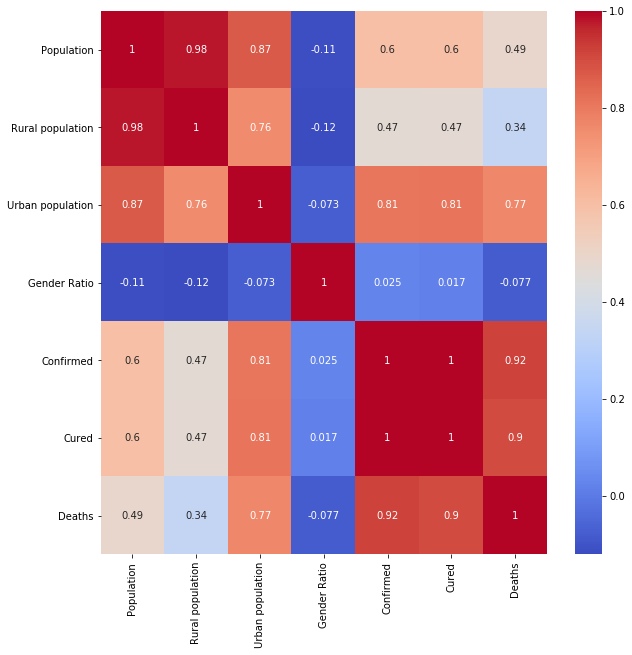

In [222]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset[5].iloc[:,0:10].corr(),annot=True,cmap='coolwarm')

In [223]:
dataset[5].fillna(0,inplace=True)

In [224]:
dataset[5].rename({'Area':'Area(km2)','Density':'Density(/km2)'},axis=1,inplace=True)

In [225]:
f = dataset[5]['Area(km2)'].str.extract('(\d*),(\d*)', expand=False)[[0]]
s = dataset[5]['Area(km2)'].str.extract('(\d*),(\d*)', expand=False)[[1]]

In [226]:
s[1].fillna(0,inplace=True)

In [227]:
s[1] = s[1].astype('int64')

In [228]:
s.head()

,1
0,928
1,713
2,163
3,752
4,245


In [229]:
f[0].fillna(0,inplace=True)
f[0] = f[0].astype('int64')

In [230]:
f.head()

,0
0,240
1,307
2,94
3,88
4,308


In [231]:
arr = []
for i in range(len(f)):
    arr.append(float(str(f[0][i])+str(s[1][i])))

In [232]:
arr

[240928.0,
 307713.0,
 94163.0,
 88752.0,
 308245.0,
 13058.0,
 342239.0,
 191791.0,
 19624.0,
 162968.0,
 155707.0,
 38863.0,
 79714.0,
 78438.0,
 50362.0,
 135191.0,
 44212.0,
 53483.0,
 55673.0,
 10486.0,
 22429.0,
 22327.0,
 16579.0,
 3702.0,
 83743.0,
 2181.0,
 796.0,
 1484.0,
 0.0,
 0.0,
 0.0]

In [233]:
float(dataset[5].iloc[30,:]['Area(km2)'][:3])

32.0

In [234]:
arr[28] = float(dataset[5].iloc[28,:]['Area(km2)'][:3])

In [235]:
arr[29] = float(dataset[5].iloc[29,:]['Area(km2)'][:3])

In [236]:
arr[30] = float(dataset[5].iloc[30,:]['Area(km2)'][:3])

In [237]:
dataset[5]['Area(km2)'] = arr

In [238]:
dataset[5]

,State/UT,Population,Rural population,Urban population,Area(km2),Density(/km2),Gender Ratio,Confirmed,Cured,Deaths,NumCommunityHealthCenters_HMIS_x,NumDistrictHospitals_HMIS_x,NumPrimaryHealthCenters_HMIS_x,NumPublicBeds_HMIS_x,NumRuralBeds_NHP18_x,NumRuralHospitals_NHP18_x,NumSubDistrictHospitals_HMIS_x,NumUrbanBeds_NHP18_x,NumUrbanHospitals_NHP18_x,TotalPublicHealthFacilities_HMIS_x,NumPrimaryHealthCenters_HMIS_y,NumCommunityHealthCenters_HMIS_y,NumSubDistrictHospitals_HMIS_y,NumDistrictHospitals_HMIS_y,TotalPublicHealthFacilities_HMIS_y,NumPublicBeds_HMIS_y,NumRuralHospitals_NHP18_y,NumRuralBeds_NHP18_y,NumUrbanHospitals_NHP18_y,NumUrbanBeds_NHP18_y
0,Uttar Pradesh,199812341,155317278,44495063,240928.0,"828/km2 (2,140/sq mi)",912,219457.0,162741.0,3356.0,671.0,174.0,3277.0,58310.0,39104.0,4442.0,0.0,37156.0,193.0,4122.0,3277,671,0.0,174,4122,58310,4442,39104,193,37156
1,Maharashtra,112374333,61556074,50818259,307713.0,365/km2 (950/sq mi),929,764281.0,554711.0,24103.0,430.0,70.0,2638.0,68998.0,12398.0,273.0,101.0,39048.0,438.0,3239.0,2638,430,101.0,70,3239,68998,273,12398,438,39048
2,Bihar,104099452,92341436,11758016,94163.0,"1,102/km2 (2,850/sq mi)",918,133003.0,114772.0,561.0,63.0,43.0,2007.0,17796.0,6083.0,930.0,33.0,5936.0,103.0,2146.0,2007,63,33.0,43,2146,17796,930,6083,103,5936
3,West Bengal,91276115,62183113,29093002,88752.0,"1,029/km2 (2,670/sq mi)",953,156766.0,127644.0,3126.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1374,406,70.0,55,1905,51163,1272,19684,294,58882
4,Madhya Pradesh,72626809,52557404,20069405,308245.0,236/km2 (610/sq mi),931,60875.0,46413.0,1345.0,324.0,51.0,1420.0,38140.0,10020.0,334.0,72.0,18819.0,117.0,1867.0,1420,324,72.0,51,1867,38140,334,10020,117,18819
5,Tamil Nadu,72147030,37229590,34917440,13058.0,"555/km2 (1,440/sq mi)",996,415590.0,355727.0,7137.0,385.0,32.0,1854.0,72616.0,40179.0,692.0,310.0,37353.0,525.0,2581.0,1854,385,310.0,32,2581,72616,692,40179,525,37353
6,Rajasthan,68548437,51500352,17048085,342239.0,201/km2 (520/sq mi),928,78777.0,62971.0,1030.0,579.0,33.0,2463.0,51844.0,21088.0,602.0,64.0,10760.0,150.0,3139.0,2463,579,64.0,33,3139,51844,602,21088,150,10760
7,Karnataka,61095297,37469335,23625962,191791.0,319/km2 (830/sq mi),973,327076.0,235128.0,5483.0,207.0,42.0,2547.0,56333.0,21072.0,2471.0,147.0,49093.0,374.0,2943.0,2547,207,147.0,42,2943,56333,2471,21072,374,49093
8,Gujarat,60439692,34694609,25745083,19624.0,308/km2 (800/sq mi),919,93734.0,75636.0,2989.0,385.0,37.0,1770.0,41129.0,11715.0,364.0,44.0,20565.0,122.0,2236.0,1770,385,44.0,37,2236,41129,364,11715,122,20565
9,Andhra Pradesh,49577103,34966693,14610410,162968.0,303/km2 (780/sq mi),993,414164.0,312687.0,3796.0,198.0,20.0,1417.0,60799.0,6480.0,193.0,31.0,16658.0,65.0,1666.0,1417,198,31.0,20,1666,60799,193,6480,65,16658


In [239]:
f = []
s = []

In [240]:
arr = []
for i in dataset[5]['Density(/km2)'].values:
    s = ''
    for j in i:
        if(j!='/'):
            if(j!=','):
                s = s + j
        else:
            break
    arr.append(s)

In [241]:
arr

['828',
 '365',
 '1102',
 '1029',
 '236',
 '555',
 '201',
 '319',
 '308',
 '303',
 '269',
 '859',
 '414',
 '397',
 '550',
 '189',
 '573',
 '189',
 '123',
 '350',
 '132',
 '122',
 '119',
 '394',
 '17',
 '52',
 '86',
 '11297',
 '2598',
 '9252',
 '2013']

In [242]:
dataset[5]['Density(/km2)'] = arr

In [243]:
dataset[5]['Density(/km2)'] = pd.to_numeric(dataset[5]['Density(/km2)'])

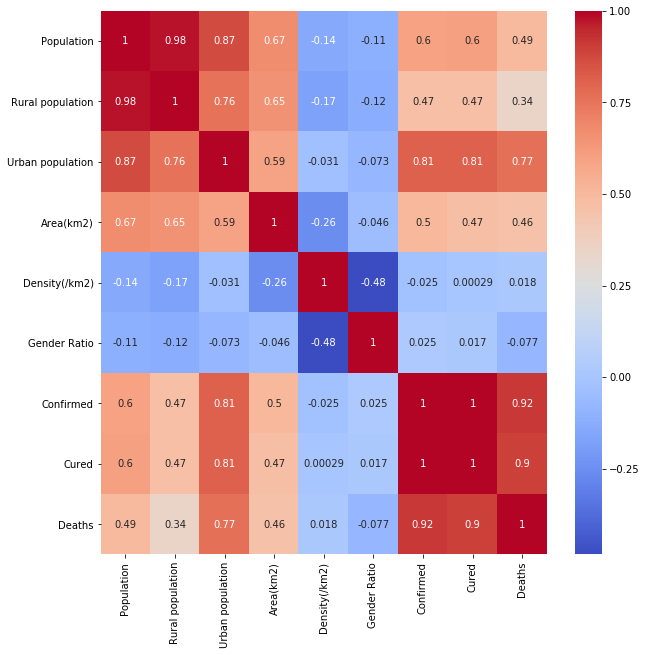

In [244]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset[5].iloc[:,:10].corr(),annot=True,cmap='coolwarm')

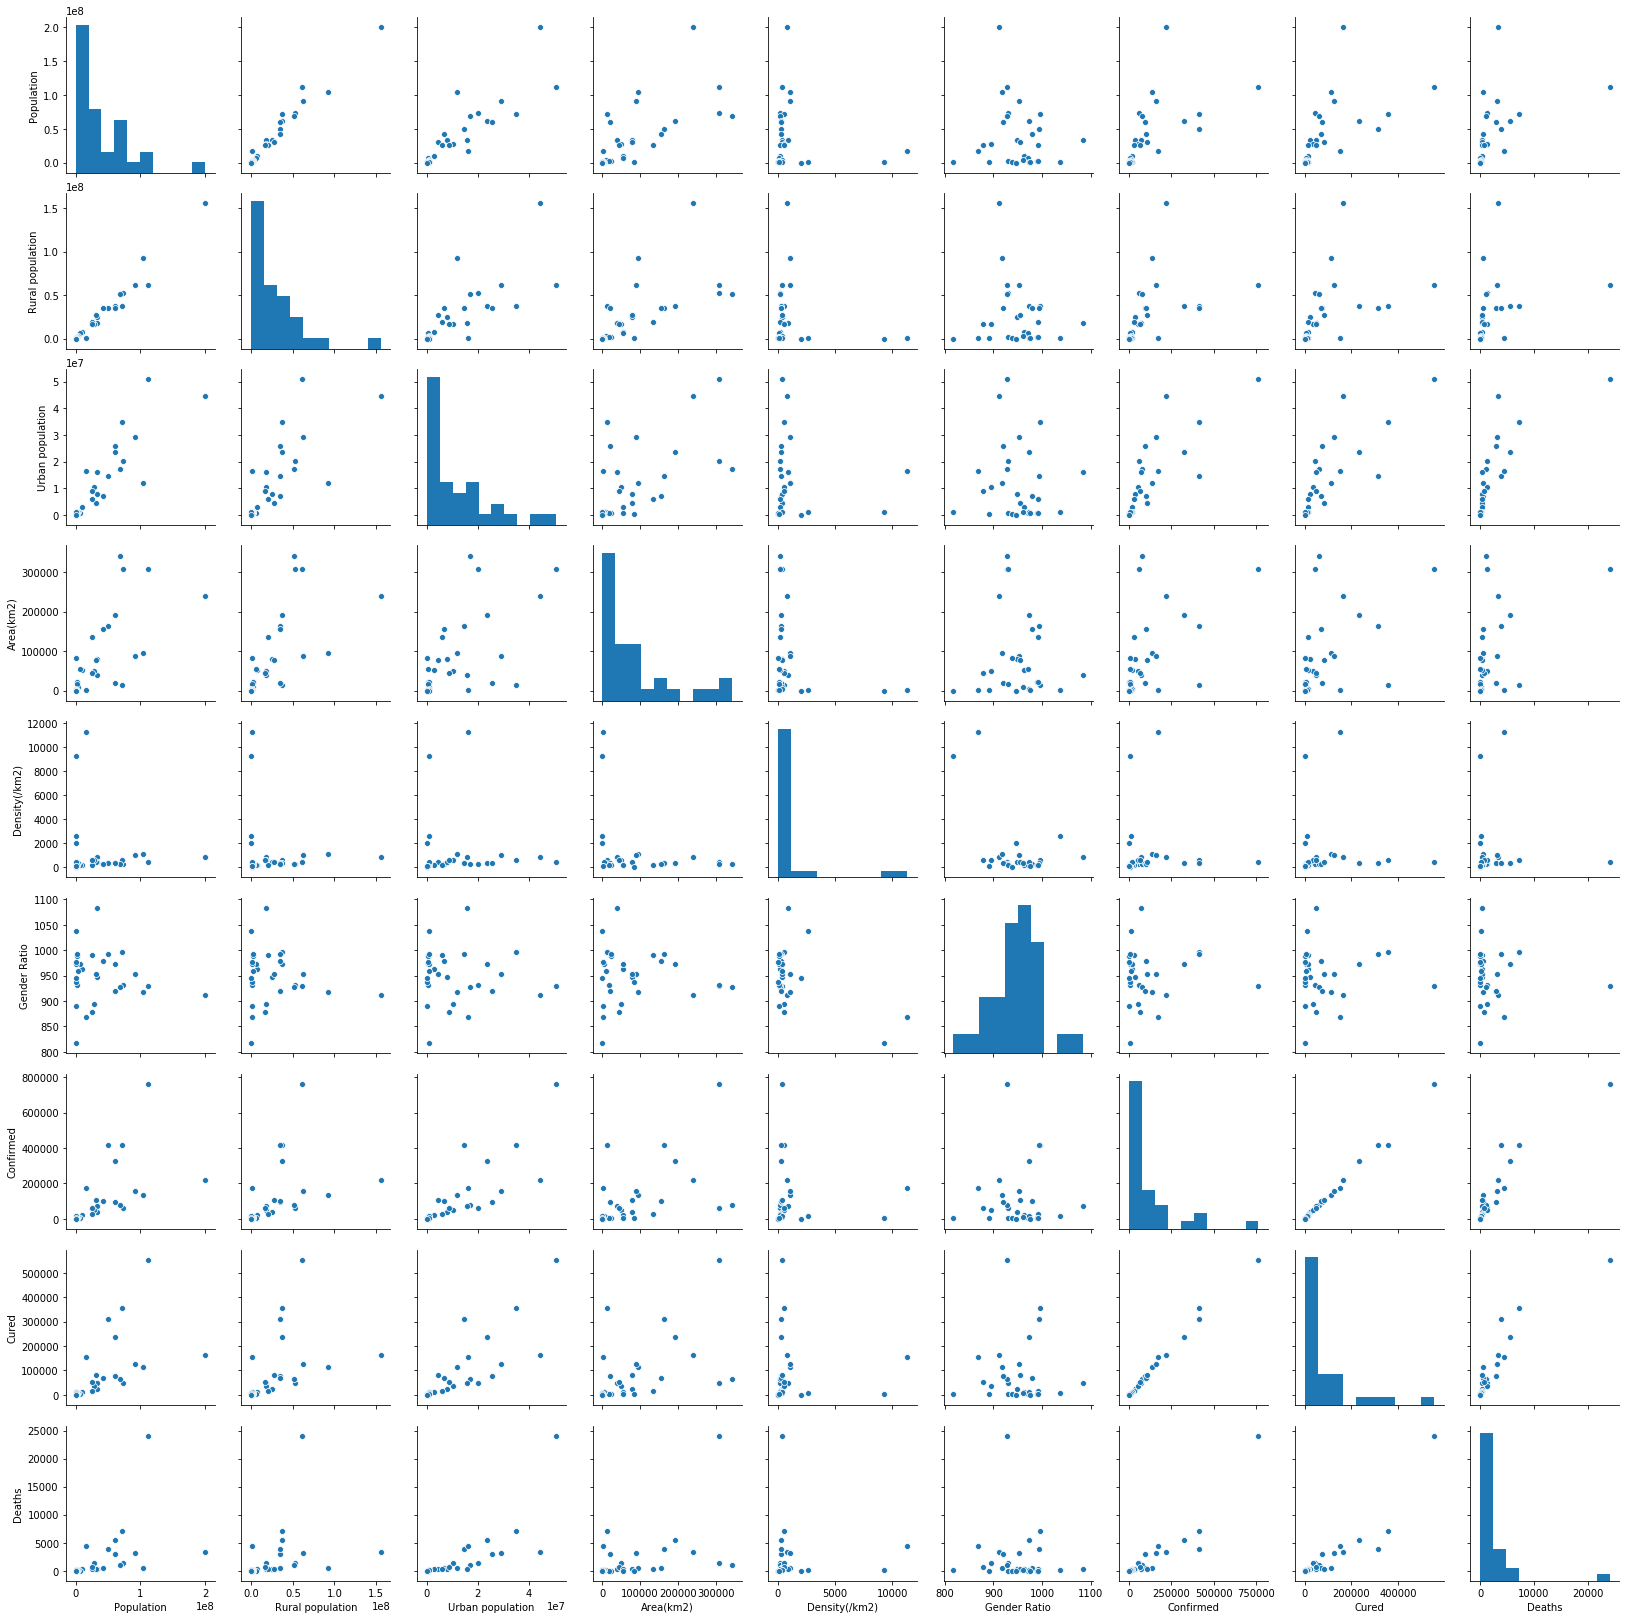

In [245]:
sns.pairplot(dataset[5].iloc[:,:10])

In [246]:
dataset[5].head()

,State/UT,Population,Rural population,Urban population,Area(km2),Density(/km2),Gender Ratio,Confirmed,Cured,Deaths,NumCommunityHealthCenters_HMIS_x,NumDistrictHospitals_HMIS_x,NumPrimaryHealthCenters_HMIS_x,NumPublicBeds_HMIS_x,NumRuralBeds_NHP18_x,NumRuralHospitals_NHP18_x,NumSubDistrictHospitals_HMIS_x,NumUrbanBeds_NHP18_x,NumUrbanHospitals_NHP18_x,TotalPublicHealthFacilities_HMIS_x,NumPrimaryHealthCenters_HMIS_y,NumCommunityHealthCenters_HMIS_y,NumSubDistrictHospitals_HMIS_y,NumDistrictHospitals_HMIS_y,TotalPublicHealthFacilities_HMIS_y,NumPublicBeds_HMIS_y,NumRuralHospitals_NHP18_y,NumRuralBeds_NHP18_y,NumUrbanHospitals_NHP18_y,NumUrbanBeds_NHP18_y
0,Uttar Pradesh,199812341,155317278,44495063,240928.0,828,912,219457.0,162741.0,3356.0,671.0,174.0,3277.0,58310.0,39104.0,4442.0,0.0,37156.0,193.0,4122.0,3277,671,0.0,174,4122,58310,4442,39104,193,37156
1,Maharashtra,112374333,61556074,50818259,307713.0,365,929,764281.0,554711.0,24103.0,430.0,70.0,2638.0,68998.0,12398.0,273.0,101.0,39048.0,438.0,3239.0,2638,430,101.0,70,3239,68998,273,12398,438,39048
2,Bihar,104099452,92341436,11758016,94163.0,1102,918,133003.0,114772.0,561.0,63.0,43.0,2007.0,17796.0,6083.0,930.0,33.0,5936.0,103.0,2146.0,2007,63,33.0,43,2146,17796,930,6083,103,5936
3,West Bengal,91276115,62183113,29093002,88752.0,1029,953,156766.0,127644.0,3126.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1374,406,70.0,55,1905,51163,1272,19684,294,58882
4,Madhya Pradesh,72626809,52557404,20069405,308245.0,236,931,60875.0,46413.0,1345.0,324.0,51.0,1420.0,38140.0,10020.0,334.0,72.0,18819.0,117.0,1867.0,1420,324,72.0,51,1867,38140,334,10020,117,18819


In [247]:
dataset[0]

,Sno,AgeGroup,TotalCases,Percentage
0,1,0-9,22,3.18%
1,2,10-19,27,3.90%
2,3,20-29,172,24.86%
3,4,30-39,146,21.10%
4,5,40-49,112,16.18%
5,6,50-59,77,11.13%
6,7,60-69,89,12.86%
7,8,70-79,28,4.05%
8,9,>=80,10,1.45%
9,10,Missing,9,1.30%


In [250]:
age_group = []
age_0_to_9 = {}
age_10_to_19 = {}
age_20_to_29 = {}
age_30_to_39 = {}
age_40_to_49 = {}
age_50_to_59 = {}
age_60_to_69 = {}
age_70_to_79 = {}
age_80_to_89 = {}
age_90_to_99 = {}
for i in dataset[5][['State/UT','Confirmed']].values:
    print(i[0],i[1])
    age_0_to_9[i[0]] = round(3.18*i[1]/100)
    age_10_to_19[i[0]] = round(3.9*i[1]/100)
    age_20_to_29[i[0]] = round(24.86*i[1]/100)
    age_30_to_39[i[0]] = round(21.10*i[1]/100)
    age_40_to_49[i[0]] = round(16.18*i[1]/100)
    age_50_to_59[i[0]] = round(11.13*i[1]/100)
    age_60_to_69[i[0]] = round(12.86*i[1]/100)
    age_70_to_79[i[0]] = round(4.05*i[1]/100)
    age_80_to_89[i[0]] = round(1.45*i[1]/100)
    age_90_to_99[i[0]] = round(1.3*i[1]/100)
age_group = [age_0_to_9,age_10_to_19,age_20_to_29,age_30_to_39,
             age_40_to_49,age_50_to_59,age_60_to_69,age_70_to_79,age_80_to_89,age_90_to_99]
age_group_name = ['age_0_to_9','age_10_to_19','age_20_to_29','age_30_to_39',
             'age_40_to_49','age_50_to_59','age_60_to_69','age_70_to_79','age_80_to_89','age_90_to_99']

Uttar Pradesh 219457.0
Maharashtra 764281.0
Bihar 133003.0
West Bengal 156766.0
Madhya Pradesh 60875.0
Tamil Nadu 415590.0
Rajasthan 78777.0
Karnataka 327076.0
Gujarat 93734.0
Andhra Pradesh 414164.0
Odisha 97920.0
Kerala 71701.0
Jharkhand 36857.0
Assam 103794.0
Punjab 50848.0
Chhattisgarh 28746.0
Haryana 61987.0
Uttarakhand 18571.0
Himachal Pradesh 5781.0
Tripura 11307.0
Meghalaya 2283.0
Manipur 5960.0
Nagaland 3851.0
Goa 16553.0
Arunachal Pradesh 3877.0
Mizoram 1008.0
Sikkim 1602.0
Delhi 171366.0
Puducherry 13556.0
Chandigarh 3985.0
Lakshadweep 144.0


In [251]:
age_group[0]

{'Uttar Pradesh': 6979,
 'Maharashtra': 24304,
 'Bihar': 4229,
 'West Bengal': 4985,
 'Madhya Pradesh': 1936,
 'Tamil Nadu': 13216,
 'Rajasthan': 2505,
 'Karnataka': 10401,
 'Gujarat': 2981,
 'Andhra Pradesh': 13170,
 'Odisha': 3114,
 'Kerala': 2280,
 'Jharkhand': 1172,
 'Assam': 3301,
 'Punjab': 1617,
 'Chhattisgarh': 914,
 'Haryana': 1971,
 'Uttarakhand': 591,
 'Himachal Pradesh': 184,
 'Tripura': 360,
 'Meghalaya': 73,
 'Manipur': 190,
 'Nagaland': 122,
 'Goa': 526,
 'Arunachal Pradesh': 123,
 'Mizoram': 32,
 'Sikkim': 51,
 'Delhi': 5449,
 'Puducherry': 431,
 'Chandigarh': 127,
 'Lakshadweep': 5}

In [252]:
for i in range(len(age_group)):
    d = {}
    state = list(age_group[i].keys())
    age_groups = list(age_group[i].values())
    d['State/UT'] = state
    d[age_group_name[i]] = age_groups
    dataset[5] = dataset[5].merge(pd.DataFrame(d),on='State/UT',how='inner')
dataset[5]    

,State/UT,Population,Rural population,Urban population,Area(km2),Density(/km2),Gender Ratio,Confirmed,Cured,Deaths,NumCommunityHealthCenters_HMIS_x,NumDistrictHospitals_HMIS_x,NumPrimaryHealthCenters_HMIS_x,NumPublicBeds_HMIS_x,NumRuralBeds_NHP18_x,NumRuralHospitals_NHP18_x,NumSubDistrictHospitals_HMIS_x,NumUrbanBeds_NHP18_x,NumUrbanHospitals_NHP18_x,TotalPublicHealthFacilities_HMIS_x,NumPrimaryHealthCenters_HMIS_y,NumCommunityHealthCenters_HMIS_y,NumSubDistrictHospitals_HMIS_y,NumDistrictHospitals_HMIS_y,TotalPublicHealthFacilities_HMIS_y,NumPublicBeds_HMIS_y,NumRuralHospitals_NHP18_y,NumRuralBeds_NHP18_y,NumUrbanHospitals_NHP18_y,NumUrbanBeds_NHP18_y,age_0_to_9,age_10_to_19,age_20_to_29,age_30_to_39,age_40_to_49,age_50_to_59,age_60_to_69,age_70_to_79,age_80_to_89,age_90_to_99
0,Uttar Pradesh,199812341,155317278,44495063,240928.0,828,912,219457.0,162741.0,3356.0,671.0,174.0,3277.0,58310.0,39104.0,4442.0,0.0,37156.0,193.0,4122.0,3277,671,0.0,174,4122,58310,4442,39104,193,37156,6979,8559,54557,46305,35508,24426,28222,8888,3182,2853
1,Maharashtra,112374333,61556074,50818259,307713.0,365,929,764281.0,554711.0,24103.0,430.0,70.0,2638.0,68998.0,12398.0,273.0,101.0,39048.0,438.0,3239.0,2638,430,101.0,70,3239,68998,273,12398,438,39048,24304,29807,190000,161263,123661,85064,98287,30953,11082,9936
2,Bihar,104099452,92341436,11758016,94163.0,1102,918,133003.0,114772.0,561.0,63.0,43.0,2007.0,17796.0,6083.0,930.0,33.0,5936.0,103.0,2146.0,2007,63,33.0,43,2146,17796,930,6083,103,5936,4229,5187,33065,28064,21520,14803,17104,5387,1929,1729
3,West Bengal,91276115,62183113,29093002,88752.0,1029,953,156766.0,127644.0,3126.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1374,406,70.0,55,1905,51163,1272,19684,294,58882,4985,6114,38972,33078,25365,17448,20160,6349,2273,2038
4,Madhya Pradesh,72626809,52557404,20069405,308245.0,236,931,60875.0,46413.0,1345.0,324.0,51.0,1420.0,38140.0,10020.0,334.0,72.0,18819.0,117.0,1867.0,1420,324,72.0,51,1867,38140,334,10020,117,18819,1936,2374,15134,12845,9850,6775,7829,2465,883,791
5,Tamil Nadu,72147030,37229590,34917440,13058.0,555,996,415590.0,355727.0,7137.0,385.0,32.0,1854.0,72616.0,40179.0,692.0,310.0,37353.0,525.0,2581.0,1854,385,310.0,32,2581,72616,692,40179,525,37353,13216,16208,103316,87689,67242,46255,53445,16831,6026,5403
6,Rajasthan,68548437,51500352,17048085,342239.0,201,928,78777.0,62971.0,1030.0,579.0,33.0,2463.0,51844.0,21088.0,602.0,64.0,10760.0,150.0,3139.0,2463,579,64.0,33,3139,51844,602,21088,150,10760,2505,3072,19584,16622,12746,8768,10131,3190,1142,1024
7,Karnataka,61095297,37469335,23625962,191791.0,319,973,327076.0,235128.0,5483.0,207.0,42.0,2547.0,56333.0,21072.0,2471.0,147.0,49093.0,374.0,2943.0,2547,207,147.0,42,2943,56333,2471,21072,374,49093,10401,12756,81311,69013,52921,36404,42062,13247,4743,4252
8,Gujarat,60439692,34694609,25745083,19624.0,308,919,93734.0,75636.0,2989.0,385.0,37.0,1770.0,41129.0,11715.0,364.0,44.0,20565.0,122.0,2236.0,1770,385,44.0,37,2236,41129,364,11715,122,20565,2981,3656,23302,19778,15166,10433,12054,3796,1359,1219
9,Andhra Pradesh,49577103,34966693,14610410,162968.0,303,993,414164.0,312687.0,3796.0,198.0,20.0,1417.0,60799.0,6480.0,193.0,31.0,16658.0,65.0,1666.0,1417,198,31.0,20,1666,60799,193,6480,65,16658,13170,16152,102961,87389,67012,46096,53261,16774,6005,5384


In [279]:
dataset[5] = dataset[5].merge(dataset[3][['lab','address','pincode','city','State/UT','type']],on='State/UT',how='left')

In [297]:
row,col = np.where(dataset[5].isnull())
row = list(set(row))
col = list(set(col))

In [308]:
dataset[5].fillna('Not Avaliable',inplace=True)

In [311]:
pd.set_option('display.max_row',50)
dataset[5]

,State/UT,Population,Rural population,Urban population,Area(km2),Density(/km2),Gender Ratio,Confirmed,Cured,Deaths,NumCommunityHealthCenters_HMIS_x,NumDistrictHospitals_HMIS_x,NumPrimaryHealthCenters_HMIS_x,NumPublicBeds_HMIS_x,NumRuralBeds_NHP18_x,NumRuralHospitals_NHP18_x,NumSubDistrictHospitals_HMIS_x,NumUrbanBeds_NHP18_x,NumUrbanHospitals_NHP18_x,TotalPublicHealthFacilities_HMIS_x,NumPrimaryHealthCenters_HMIS_y,NumCommunityHealthCenters_HMIS_y,NumSubDistrictHospitals_HMIS_y,NumDistrictHospitals_HMIS_y,TotalPublicHealthFacilities_HMIS_y,NumPublicBeds_HMIS_y,NumRuralHospitals_NHP18_y,NumRuralBeds_NHP18_y,NumUrbanHospitals_NHP18_y,NumUrbanBeds_NHP18_y,age_0_to_9,age_10_to_19,age_20_to_29,age_30_to_39,age_40_to_49,age_50_to_59,age_60_to_69,age_70_to_79,age_80_to_89,age_90_to_99,lab,address,pincode,city,type
0,Uttar Pradesh,199812341,155317278,44495063,240928.0,828,912,219457.0,162741.0,3356.0,671.0,174.0,3277.0,58310.0,39104.0,4442.0,0.0,37156.0,193.0,4122.0,3277,671,0.0,174,4122,58310,4442,39104,193,37156,6979,8559,54557,46305,35508,24426,28222,8888,3182,2853,"King George's Medical University, Lucknow","King George's Medical University, Shah Mina Rd...",226003,Lucknow,Government Laboratory
1,Uttar Pradesh,199812341,155317278,44495063,240928.0,828,912,219457.0,162741.0,3356.0,671.0,174.0,3277.0,58310.0,39104.0,4442.0,0.0,37156.0,193.0,4122.0,3277,671,0.0,174,4122,58310,4442,39104,193,37156,6979,8559,54557,46305,35508,24426,28222,8888,3182,2853,"Institute of Medical Sciences, BHU, Varanasi","Institute of Medical Sciences, BHU, Aurobindo ...",221005,Varanasi,Government Laboratory
2,Uttar Pradesh,199812341,155317278,44495063,240928.0,828,912,219457.0,162741.0,3356.0,671.0,174.0,3277.0,58310.0,39104.0,4442.0,0.0,37156.0,193.0,4122.0,3277,671,0.0,174,4122,58310,4442,39104,193,37156,6979,8559,54557,46305,35508,24426,28222,8888,3182,2853,"Jawaharlal Nehru Medical College, Aligarh","Jawaharlal Nehru Medical College, Medical Rd, ...",202002,Aligarh,Government Laboratory
3,Uttar Pradesh,199812341,155317278,44495063,240928.0,828,912,219457.0,162741.0,3356.0,671.0,174.0,3277.0,58310.0,39104.0,4442.0,0.0,37156.0,193.0,4122.0,3277,671,0.0,174,4122,58310,4442,39104,193,37156,6979,8559,54557,46305,35508,24426,28222,8888,3182,2853,"Command Hospital, Lucknow","Command Hospital, Lucknow, Uttar Pradesh 226002",226002,Lucknow,Government Laboratory
4,Uttar Pradesh,199812341,155317278,44495063,240928.0,828,912,219457.0,162741.0,3356.0,671.0,174.0,3277.0,58310.0,39104.0,4442.0,0.0,37156.0,193.0,4122.0,3277,671,0.0,174,4122,58310,4442,39104,193,37156,6979,8559,54557,46305,35508,24426,28222,8888,3182,2853,"Lala Lajpat Rai Memorial Medical College, Meerut","Lala Lajpat Rai Memorial Medical College, Garh...",250002,Meerut,Government Laboratory
5,Uttar Pradesh,199812341,155317278,44495063,240928.0,828,912,219457.0,162741.0,3356.0,671.0,174.0,3277.0,58310.0,39104.0,4442.0,0.0,37156.0,193.0,4122.0,3277,671,0.0,174,4122,58310,4442,39104,193,37156,6979,8559,54557,46305,35508,24426,28222,8888,3182,2853,"Sanjay Gandhi Post Graduate Institute, Lucknow","Sanjay Gandhi Post Graduate Institute, New PMS...",226014,Lucknow,Government Laboratory
6,Uttar Pradesh,199812341,155317278,44495063,240928.0,828,912,219457.0,162741.0,3356.0,671.0,174.0,3277.0,58310.0,39104.0,4442.0,0.0,37156.0,193.0,4122.0,3277,671,0.0,174,4122,58310,4442,39104,193,37156,6979,8559,54557,46305,35508,24426,28222,8888,3182,2853,"Uttar Pradesh University of Medical Sciences, ...","Uttar Pradesh University of Medical Sciences, ...",206130,Saifai,Government Laboratory
7,Uttar Pradesh,199812341,155317278,44495063,240928.0,828,912,219457.0,162741.0,3356.0,671.0,174.0,3277.0,58310.0,39104.0,4442.0,0.0,37156.0,193.0,4122.0,3277,671,0.0,174,4122,58310,4442,39104,193,37156,6979,8559,54557,46305,35508,24426,28222,8888,3182,2853,"ICMR- Regional Medical Research Centre, Gorakhpur","ICMR- Regional Medical Research Centre, Baba R...",273013,Gorakhpur,Government Laboratory
8,Uttar Pradesh,199812341,155317278,444